# Proyecto: Análisis Exploratorio de los Datos y preparación de un DataSet. 

## Nombre del estudiante: Leon Loeza Alan Jafet
## Número de control: 20120126
## Materia/Grupo: Ciencia de Datos Gpo A

El siguiente proyecto tomará como set de datos un conjunto de información sobre los precios de las casas.
El set de datos tiene datos nulos, datos tipo objeto, anomalías, inconsistencias, por lo que es necesario conocimientos previos de EDA para poder prepararlo.
El objetivo es preparar un set de datos para poder usarlo posteriormente en un modelo de ML, no basta con solo volverlo numérico, necesitamos tener conocimientos sobre los datos mismos.
El resultado de esta exploración debe ser:
1. Gráficas y conclusiones acerca de los datos.
2. Eliminación de datos nulos, anomalías e inconsistencias.
3. Generación de un dataframe listo para usarse sobre un modelo de ML (numérico), con las variables, cuya correlación es más fuerte con la variable objetivo, identificadas.


## Análisis y exploración.

### Paso 1: Importar las librerías que se van a utilizar y mostrar las primeras y últimas 5 filas del dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

In [2]:
ubicacionArchivo = "casas_dataset.csv"
df = pd.read_csv(ubicacionArchivo)

In [3]:
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Paso 2: Mostrar información sobre el dataset, qué tipos son, cuántos nulos hay, datos estadísticos.

In [4]:
#informacion x columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#informacion estadistica
print(df.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [6]:
#Contabilizando nulos
print(df.isna().sum().sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


### Paso 3: Mostrar información sobre las variables "objeto" y revisar si se pueden categorizar (todavía no se categorizan, solo se exploran).

In [7]:
for columna in df:
    print("valores unicos de la columna",columna, ":" ,df[columna].nunique())

valores unicos de la columna Id : 1460
valores unicos de la columna MSSubClass : 15
valores unicos de la columna MSZoning : 5
valores unicos de la columna LotFrontage : 110
valores unicos de la columna LotArea : 1073
valores unicos de la columna Street : 2
valores unicos de la columna Alley : 2
valores unicos de la columna LotShape : 4
valores unicos de la columna LandContour : 4
valores unicos de la columna Utilities : 2
valores unicos de la columna LotConfig : 5
valores unicos de la columna LandSlope : 3
valores unicos de la columna Neighborhood : 25
valores unicos de la columna Condition1 : 9
valores unicos de la columna Condition2 : 8
valores unicos de la columna BldgType : 5
valores unicos de la columna HouseStyle : 8
valores unicos de la columna OverallQual : 10
valores unicos de la columna OverallCond : 9
valores unicos de la columna YearBuilt : 112
valores unicos de la columna YearRemodAdd : 61
valores unicos de la columna RoofStyle : 6
valores unicos de la columna RoofMatl : 8

## Posible Categorizacion
Como se puede Observar los valores unicos por columna, varian mucho; sin embargo hay una mayoria de datos que se pueden categorizar, esto debido a la poco cantidad de datos unicos que tiene la columna , para las columnas con valores unicos muy distribuidos se podria plantear crear nuvevas categorias o aplicar otro metodo de categorizacion diferente al one-hot-enconder. 

### Paso 4: Mostrar información sobre las correlaciones (variables numéricas), la variable/columna objetivo es "SalePrice".

C:\Users\mjkam\AppData\Local\Temp\ipykernel_12328\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

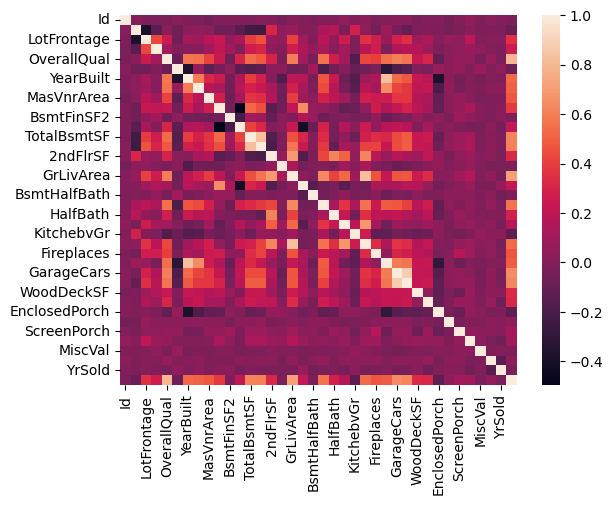

In [8]:
sns.heatmap(df.corr())

In [9]:
#Mostrando las correlaciones 
print(df.corr()["SalePrice"])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchebvGr      -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

C:\Users\mjkam\AppData\Local\Temp\ipykernel_12328\3398860353.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()["SalePrice"])


### Paso 5: Muestra de gráficas de las variables numéricas y categóricas. 
Puede ser boxplot para las numéricas y de conteo/histograma para las categóricas.

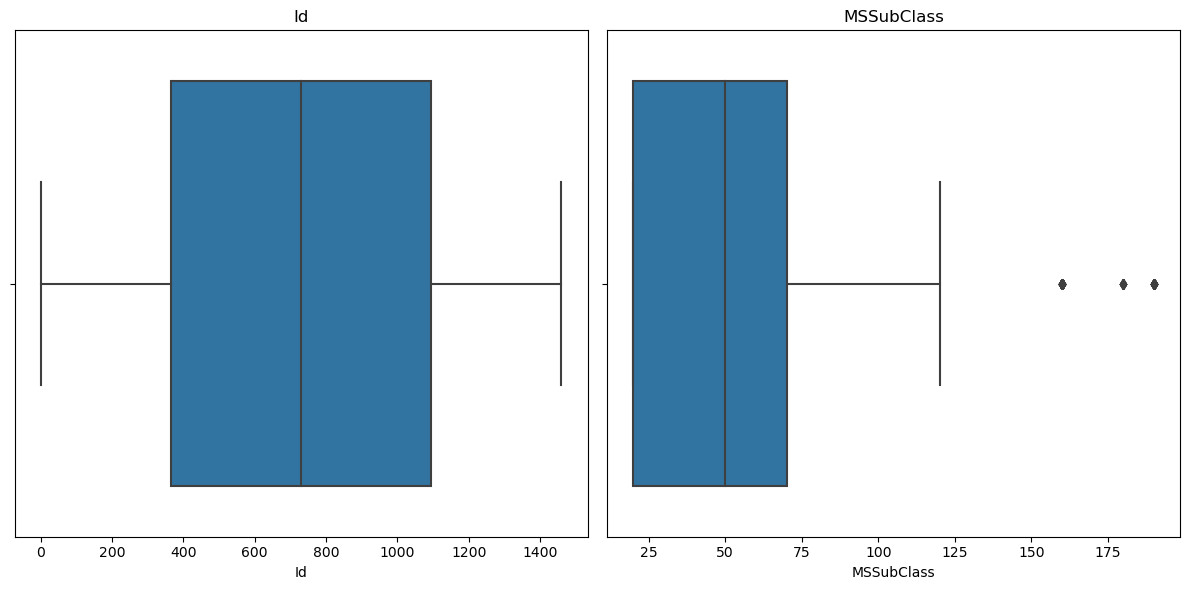

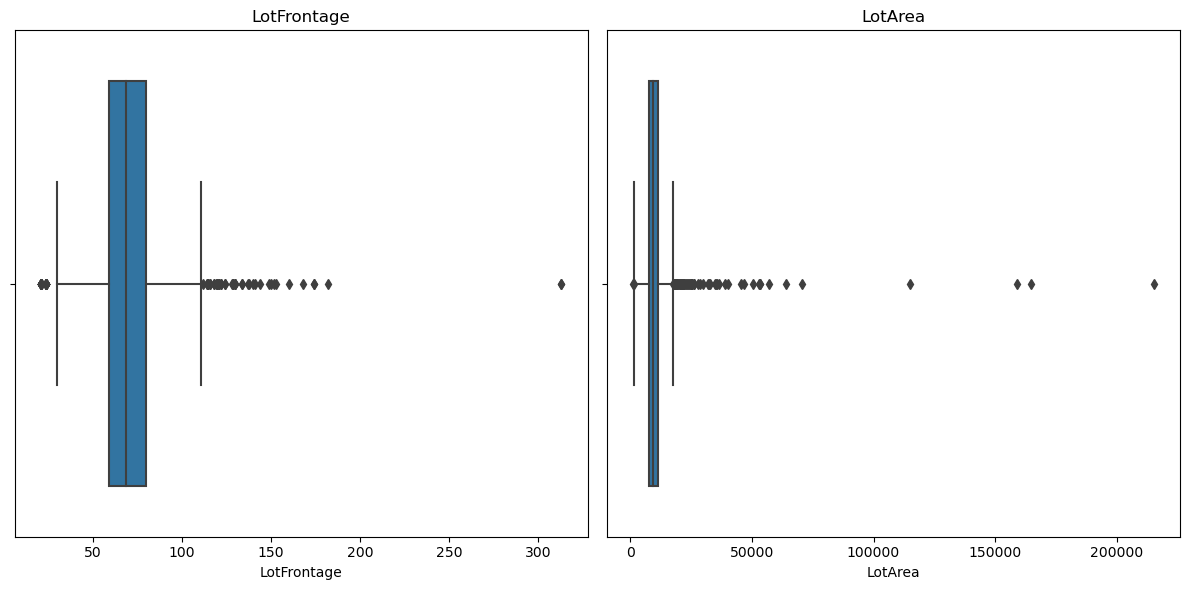

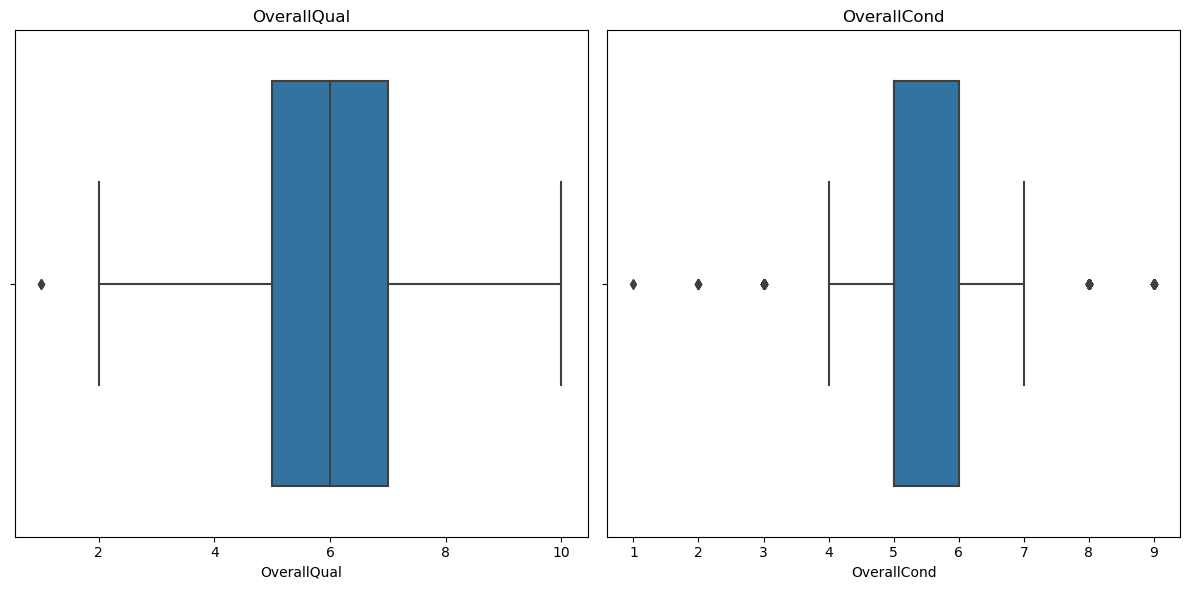

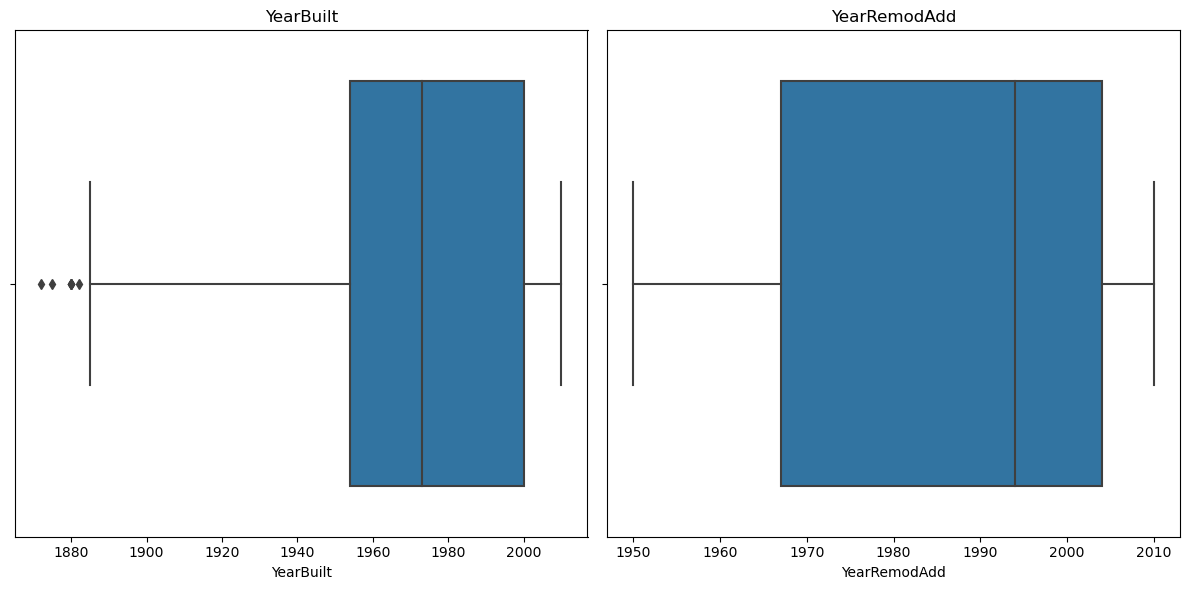

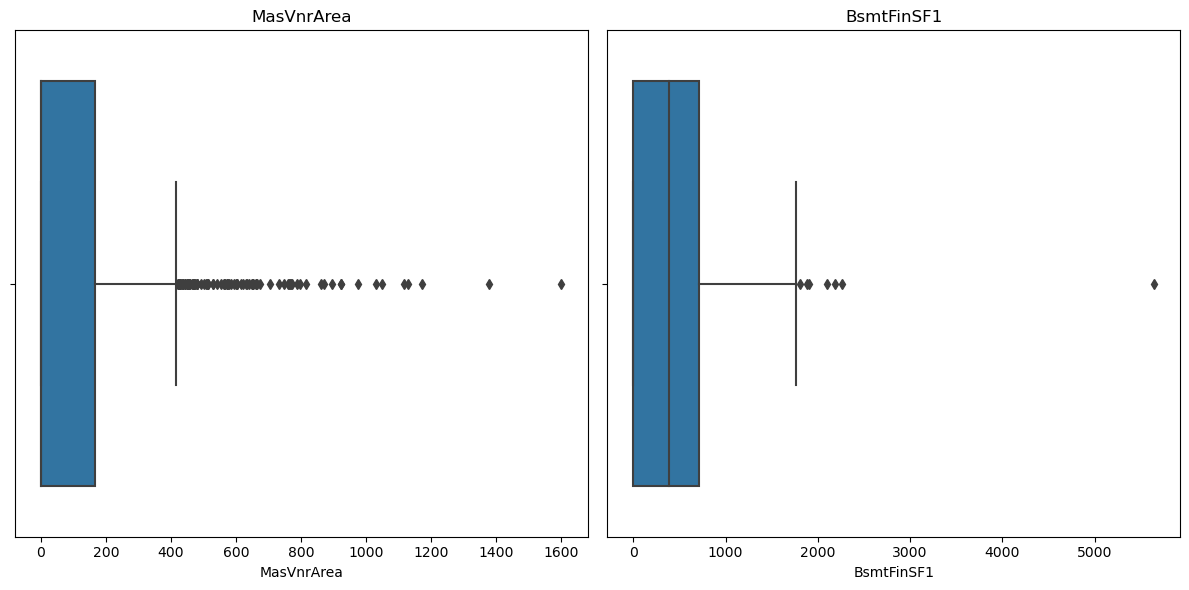

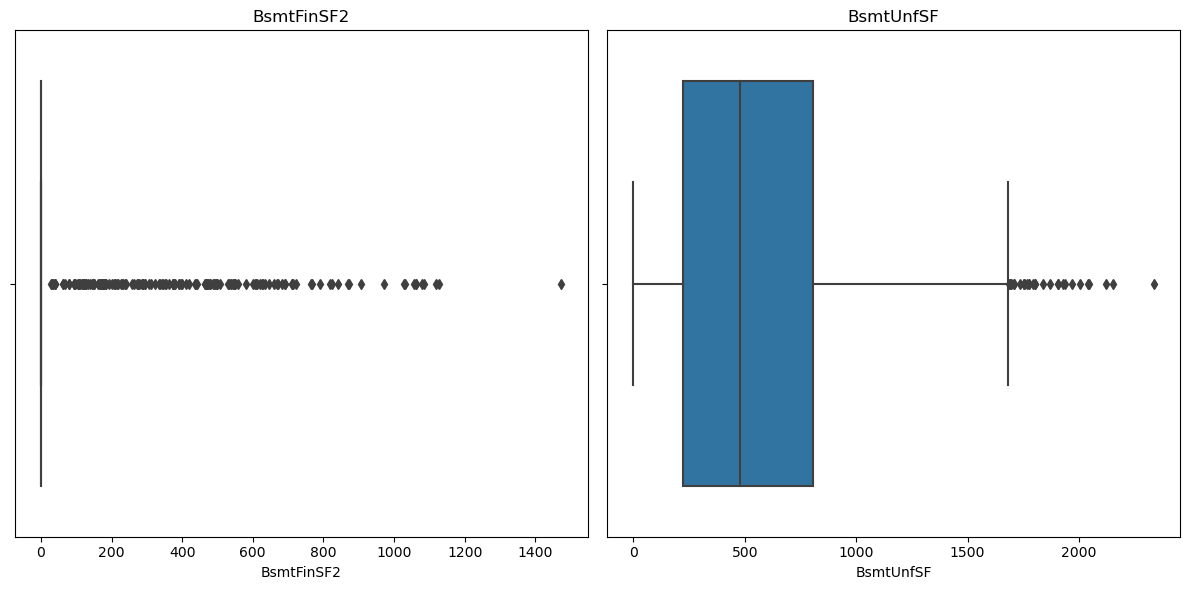

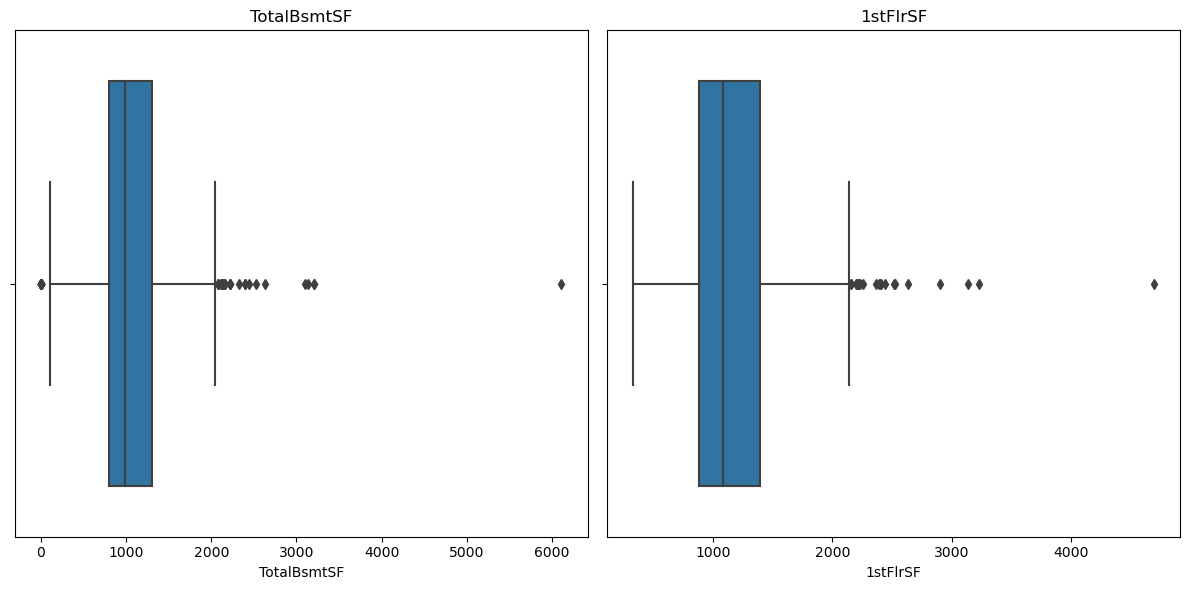

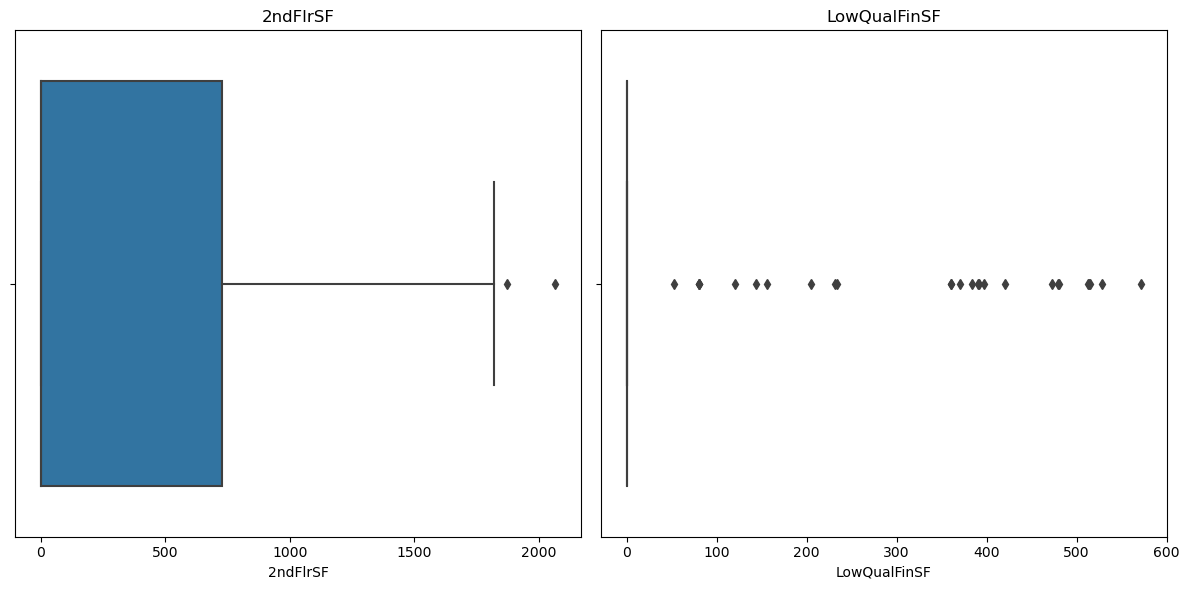

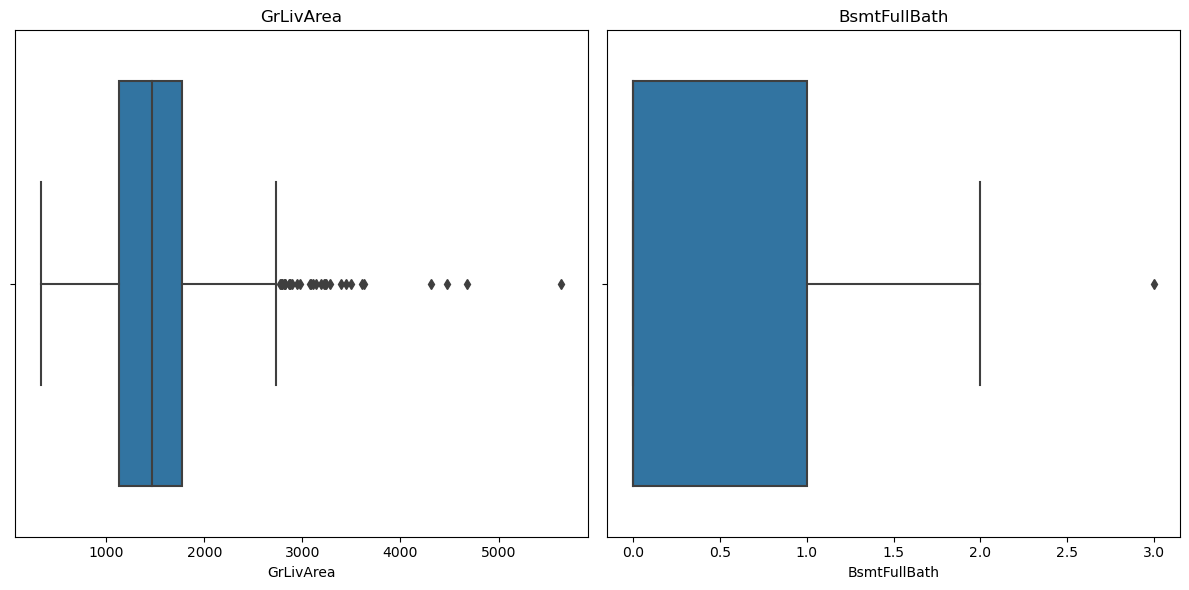

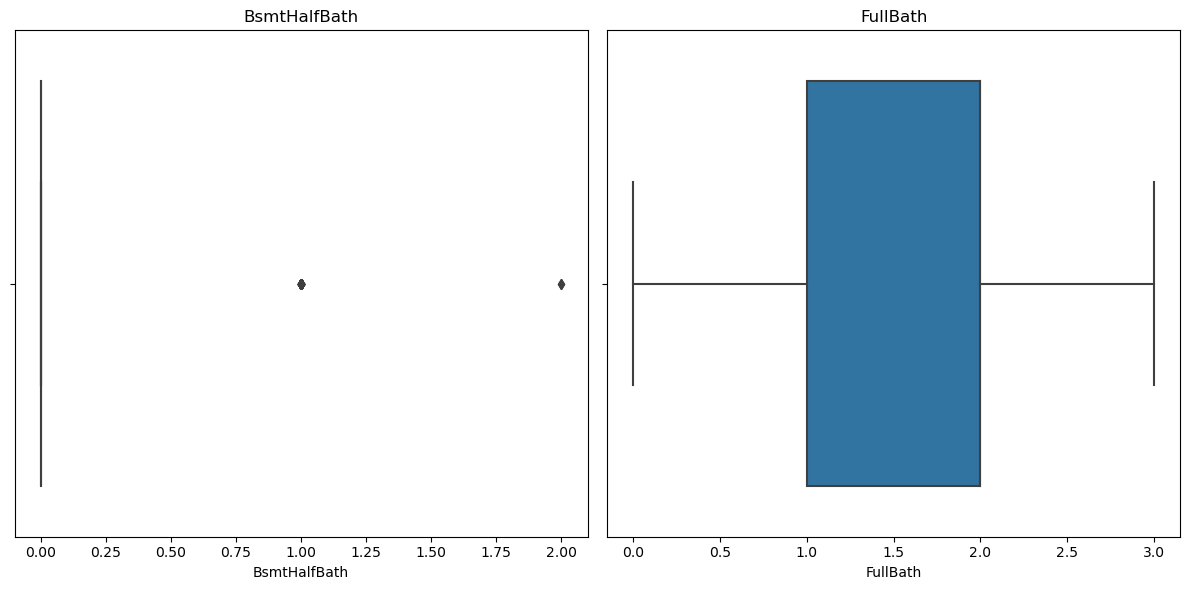

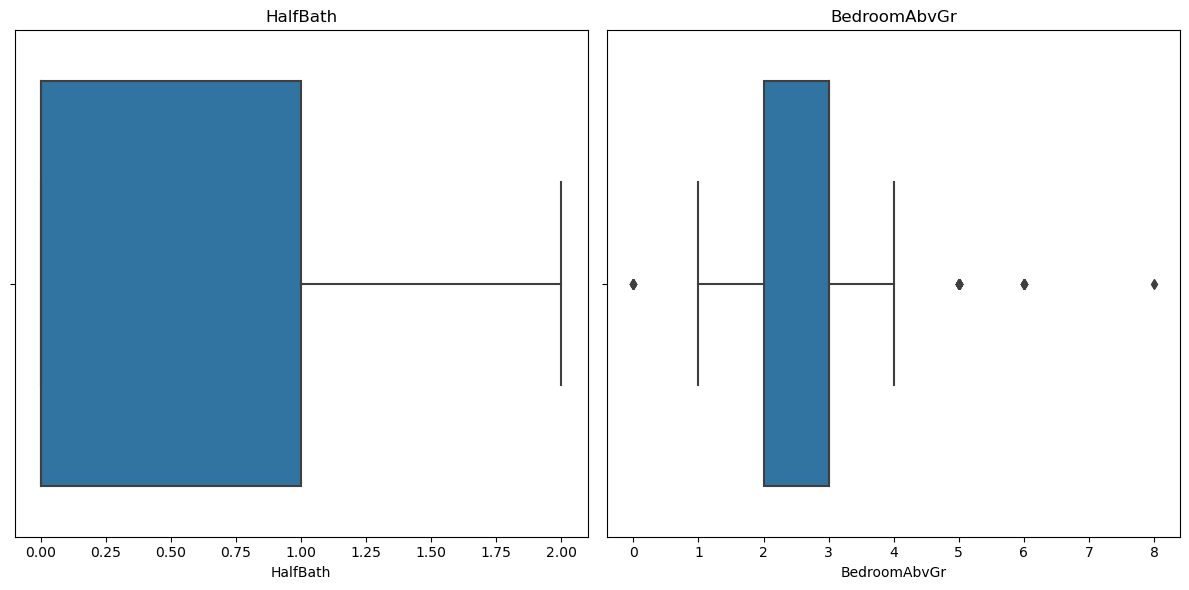

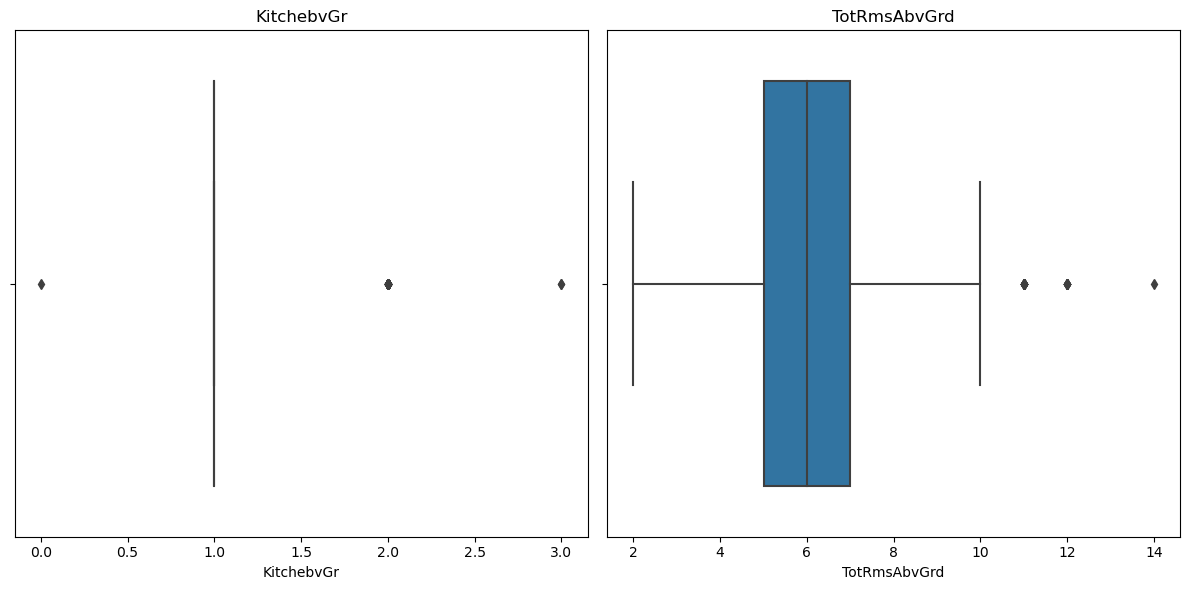

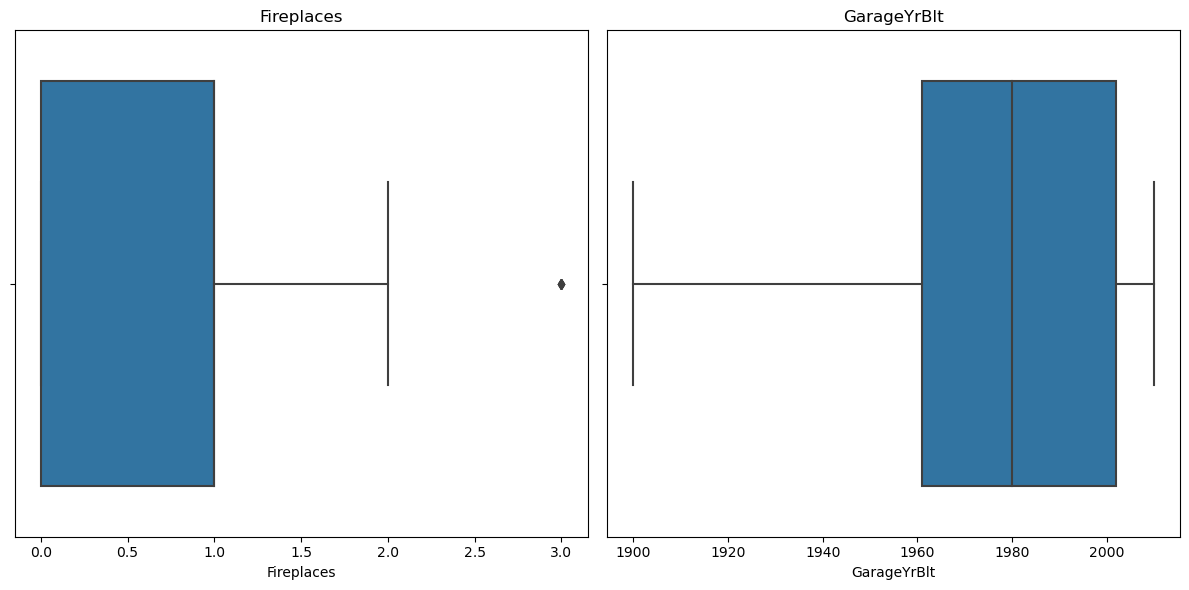

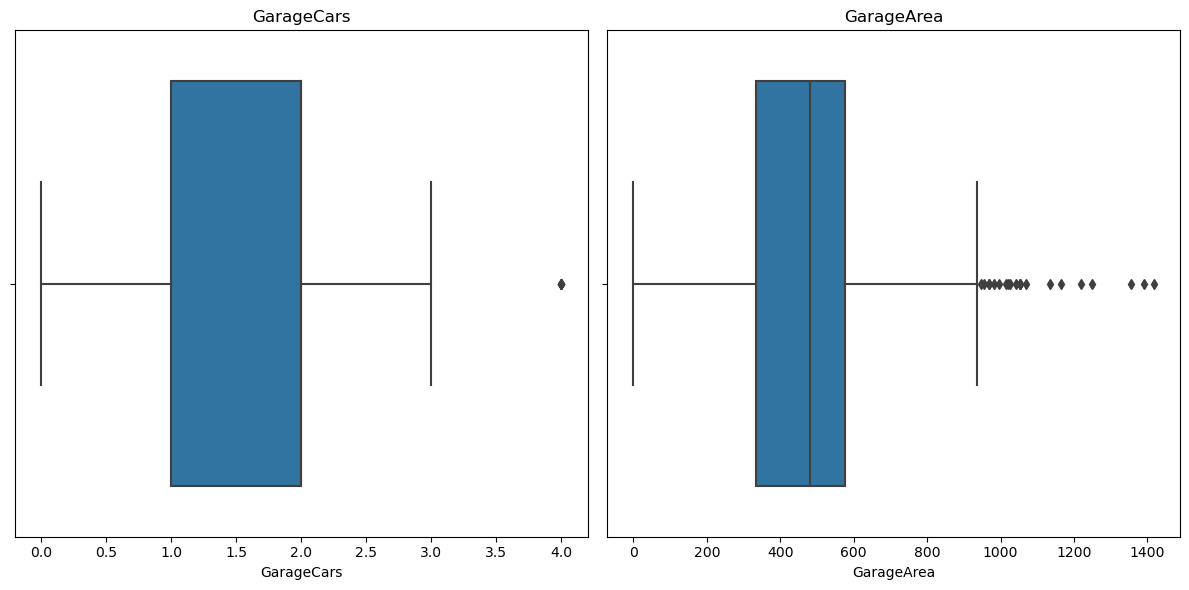

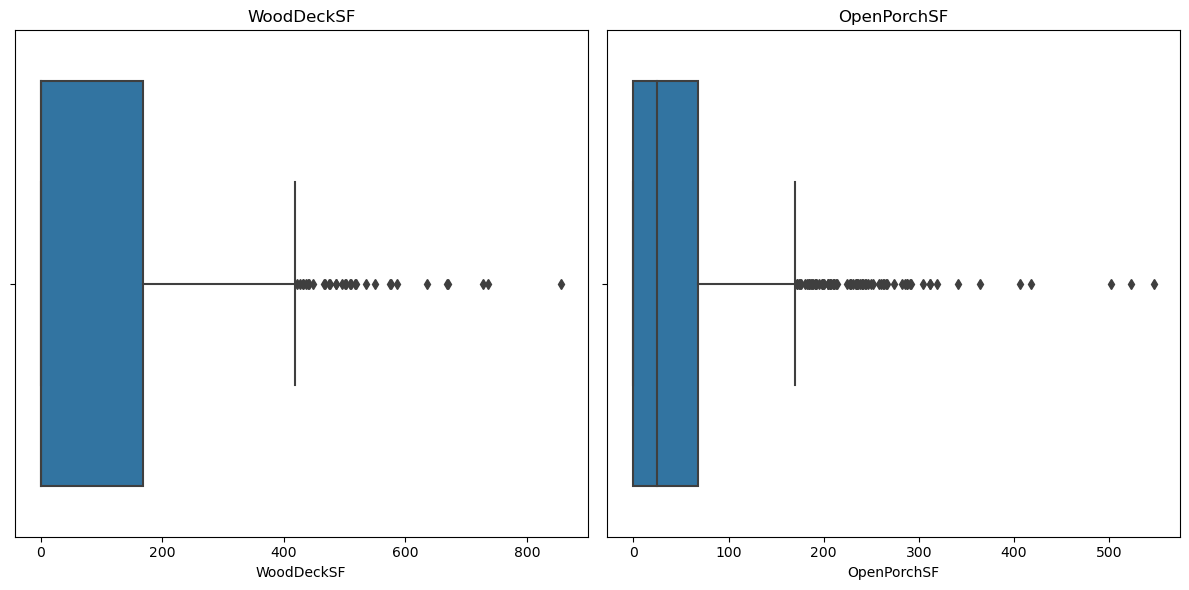

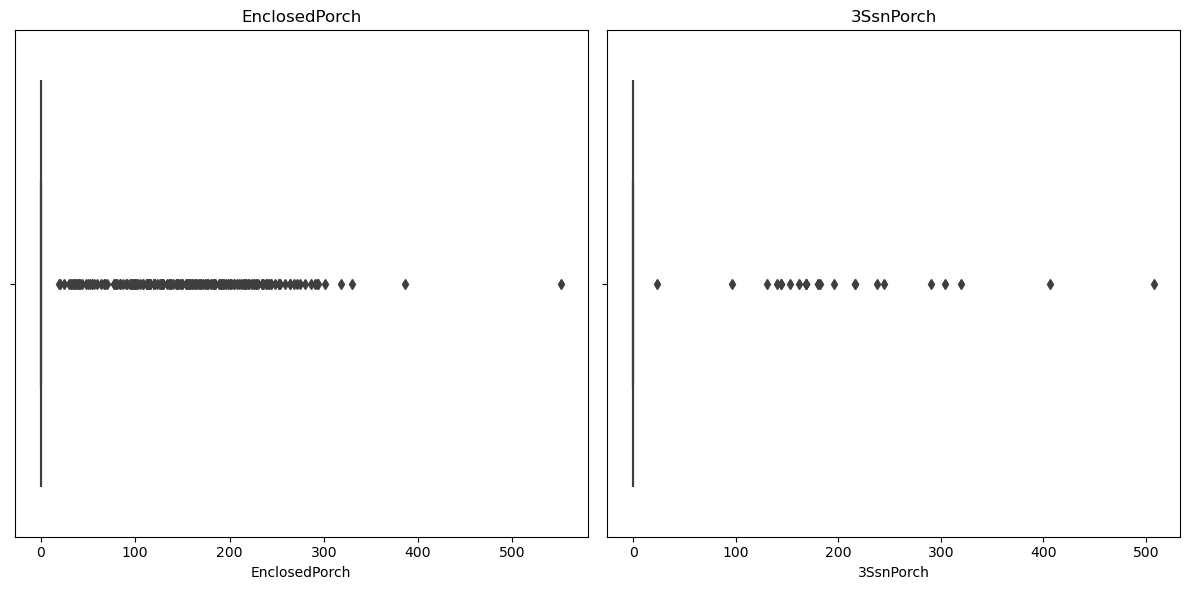

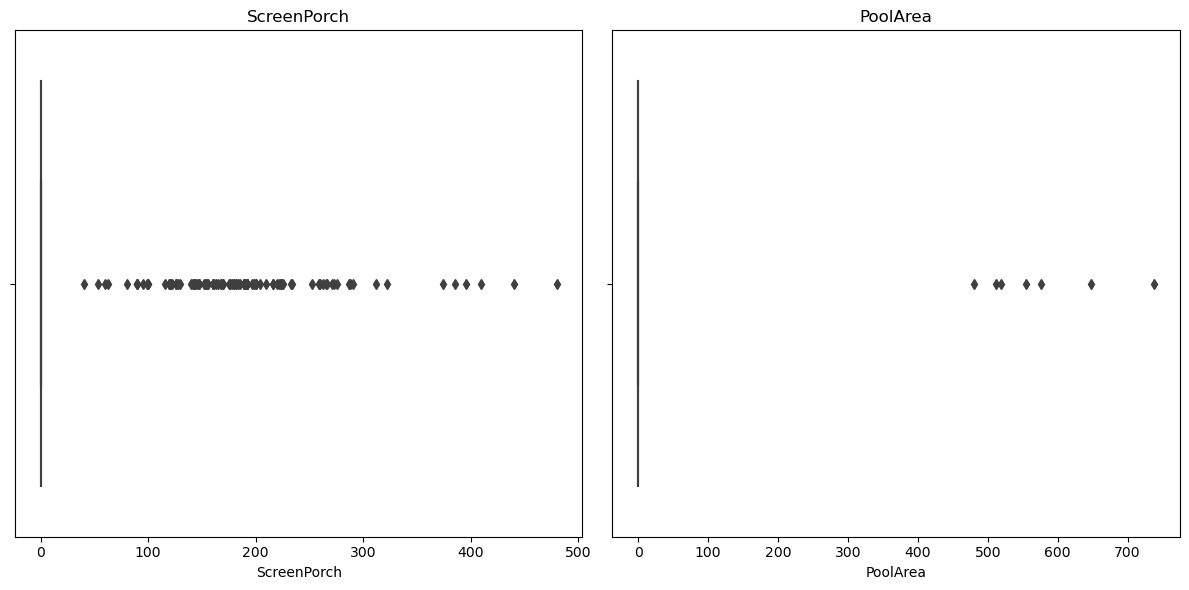

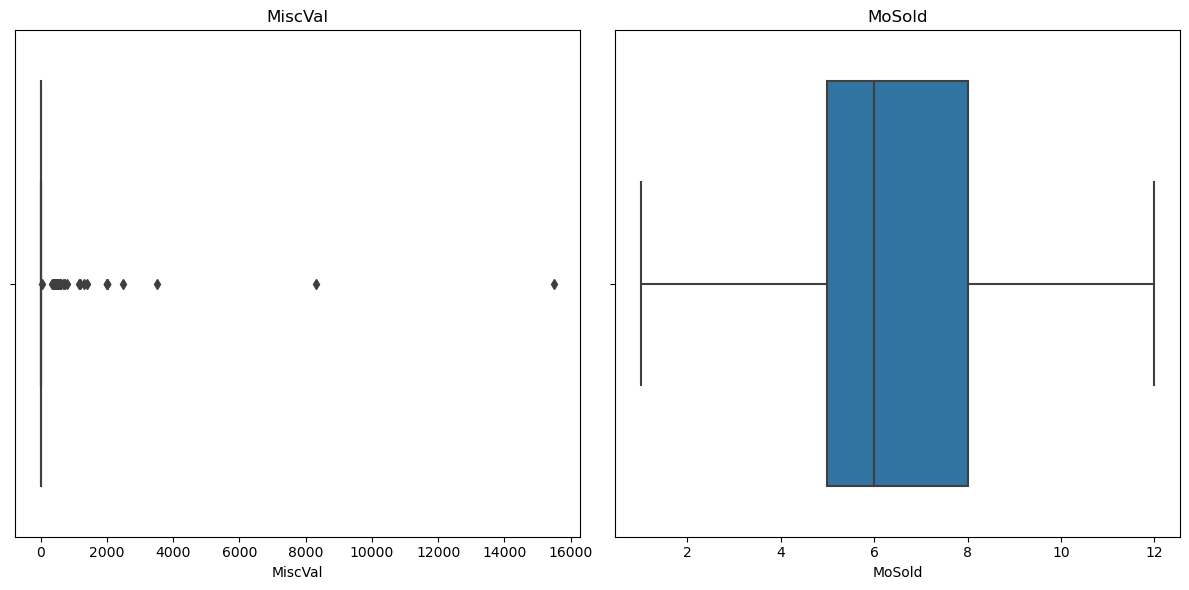

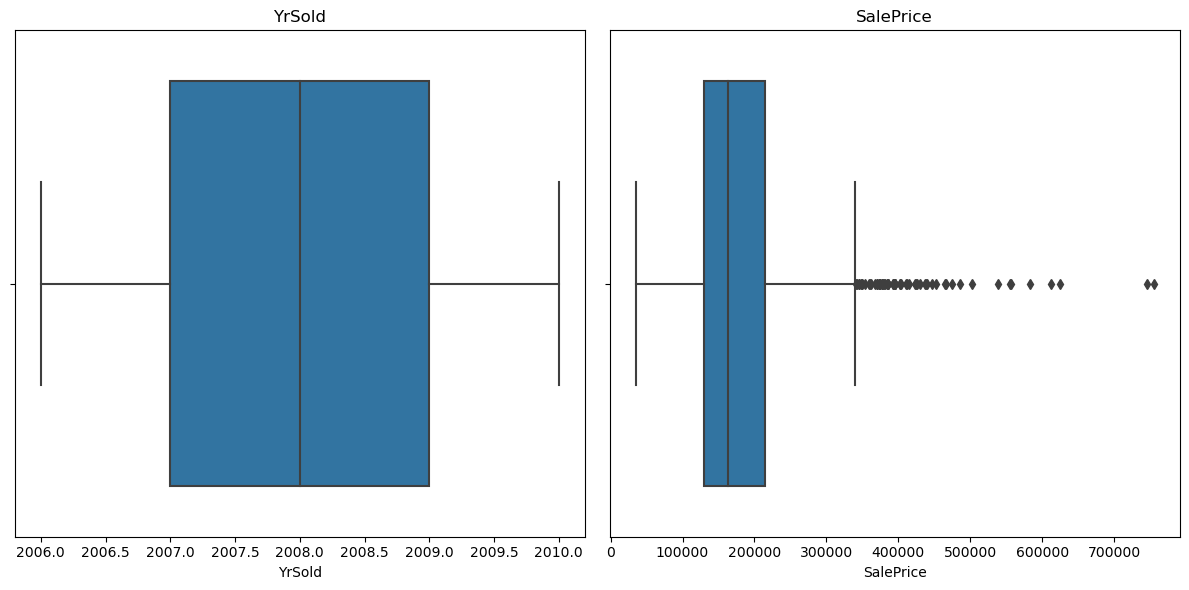

In [10]:
columnas_numericas = df.select_dtypes(include=[int, float]).columns

for i in range(0, len(columnas_numericas), 2):
    # Crea una figura con dos subgráficos en una fila
    plt.figure(figsize=(12, 6))

    # Primer subgráfico: antes de la eliminación de anomalías
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=columnas_numericas[i])
    plt.title(f"{columnas_numericas[i]}")

    # Segundo subgráfico: después de la eliminación de anomalías
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=columnas_numericas[i + 1])
    plt.title(f"{columnas_numericas[i + 1]}")

    # Ajustar el espaciado entre los subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

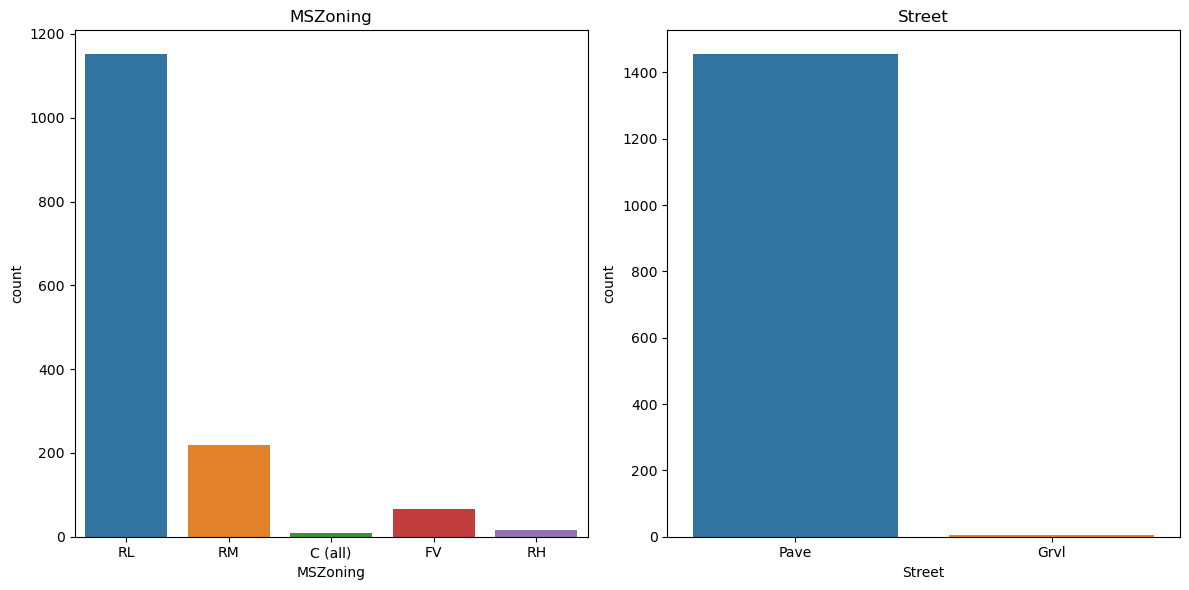

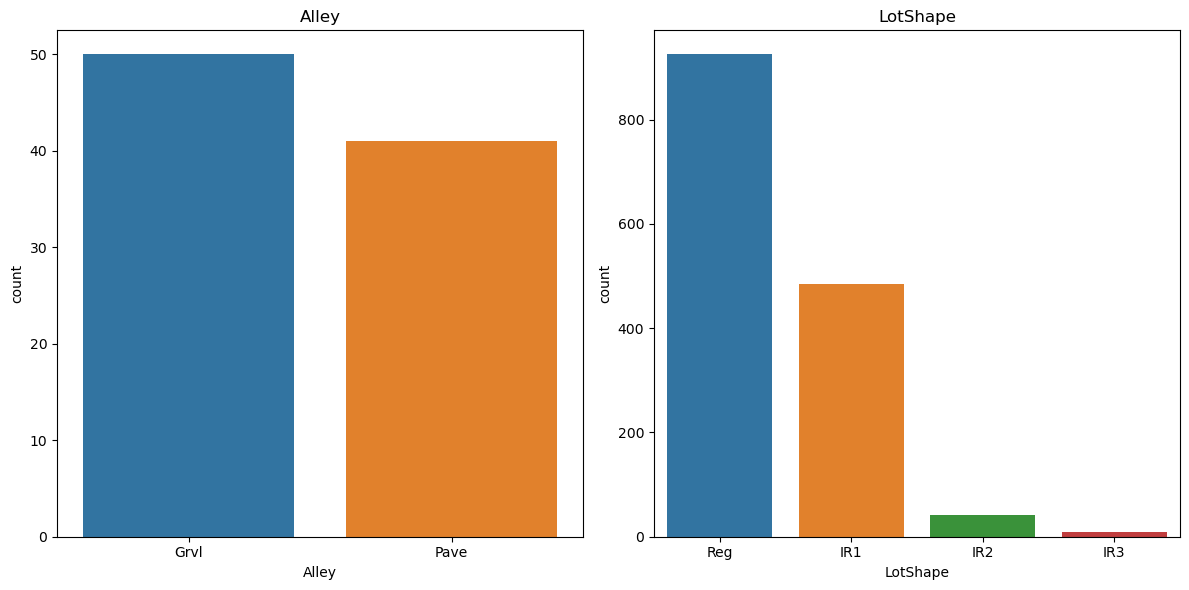

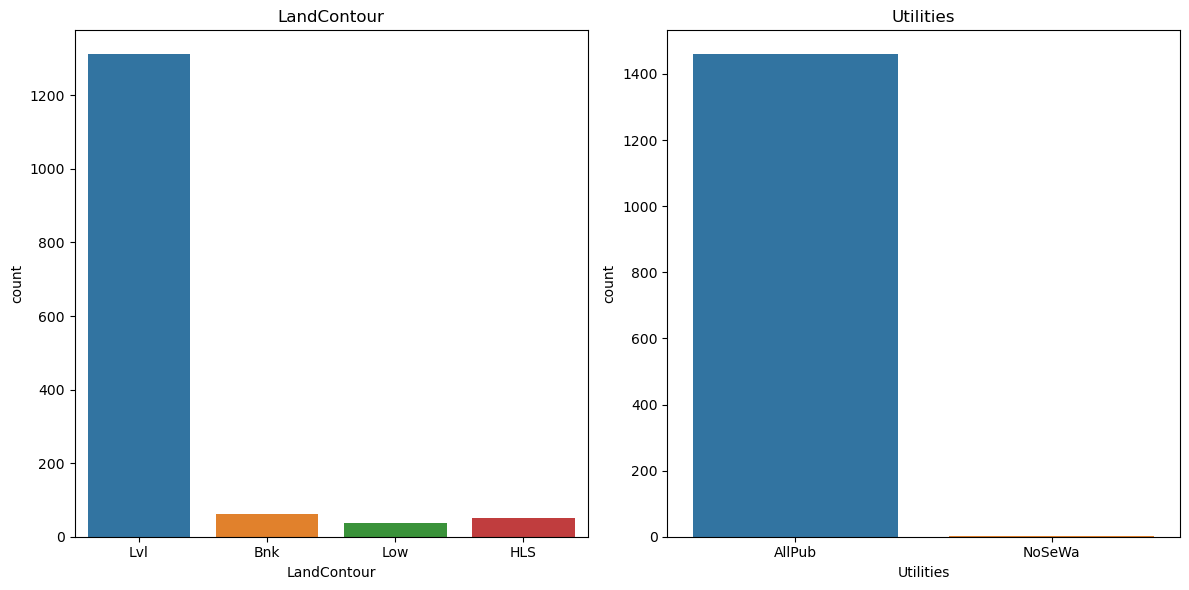

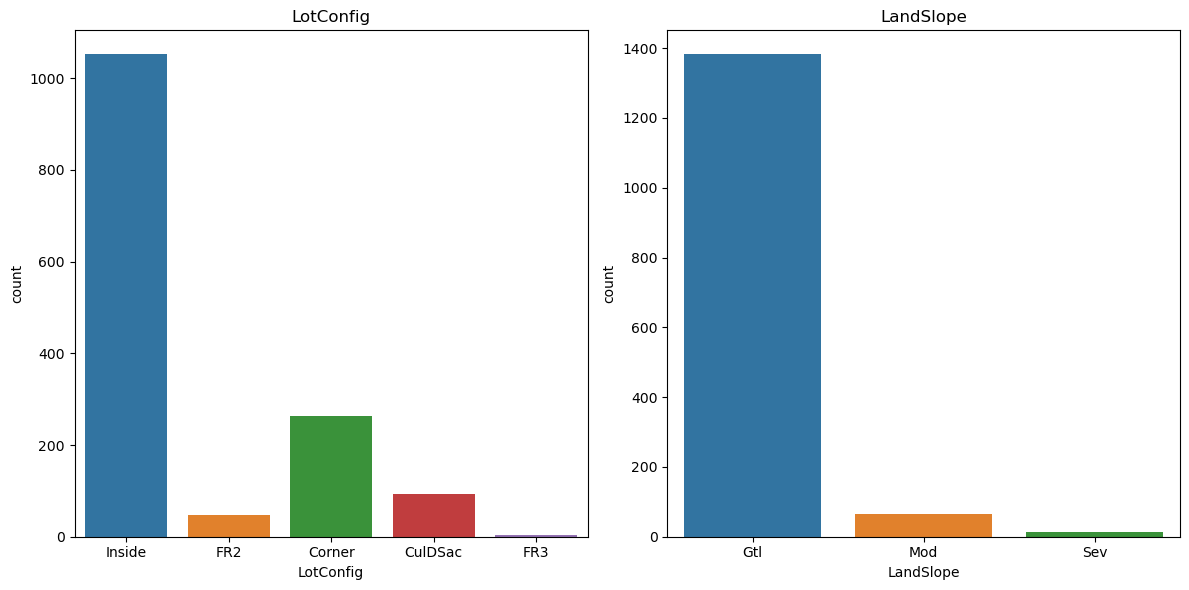

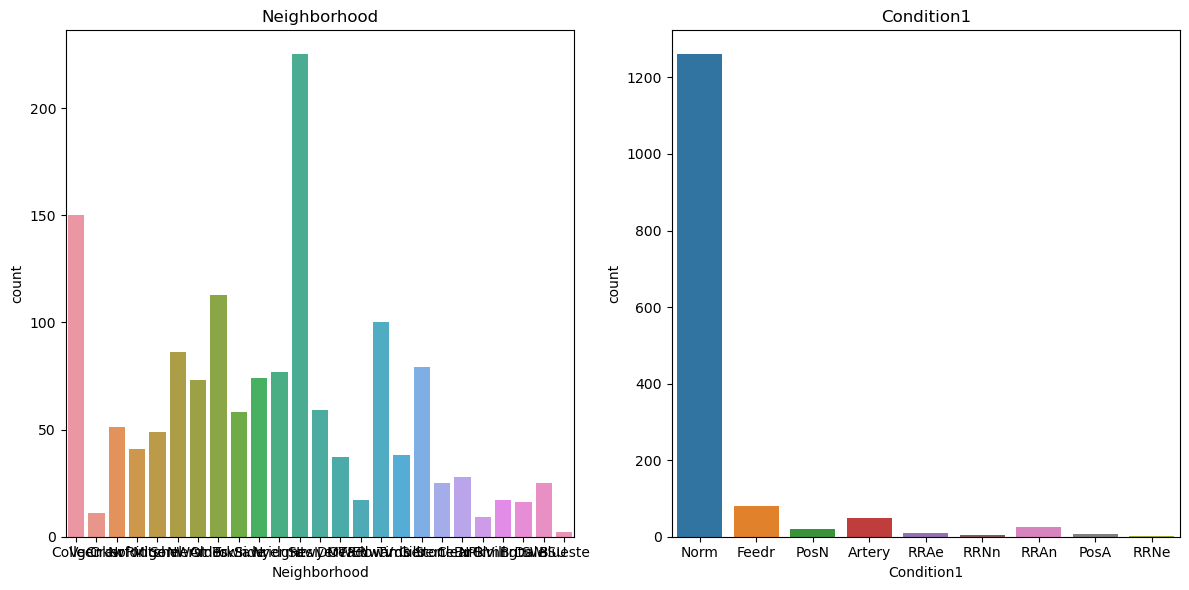

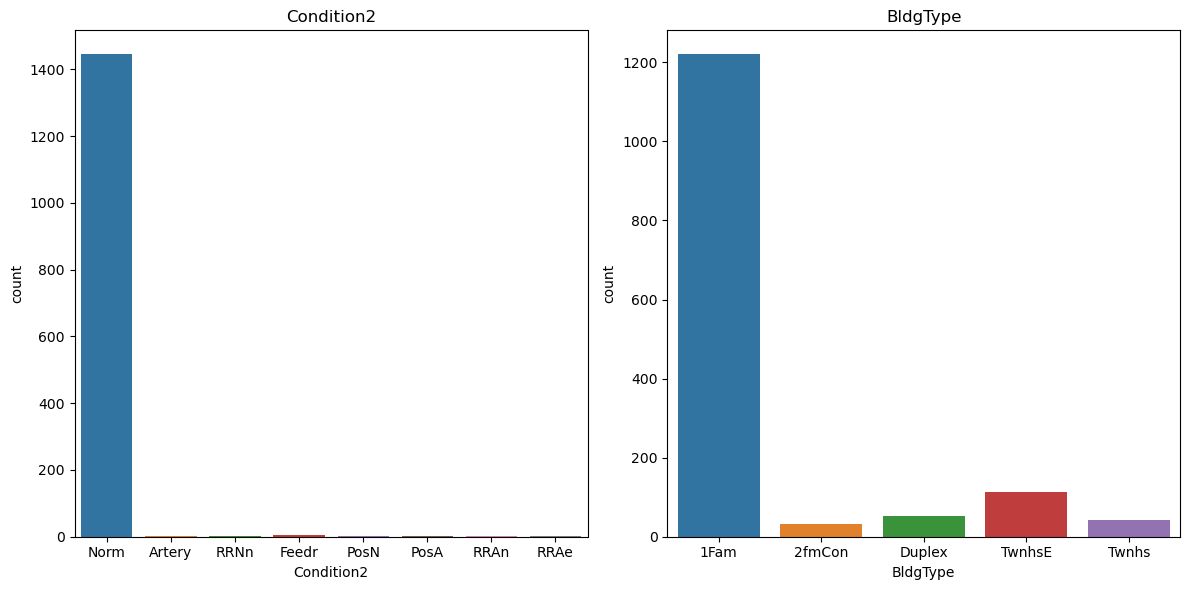

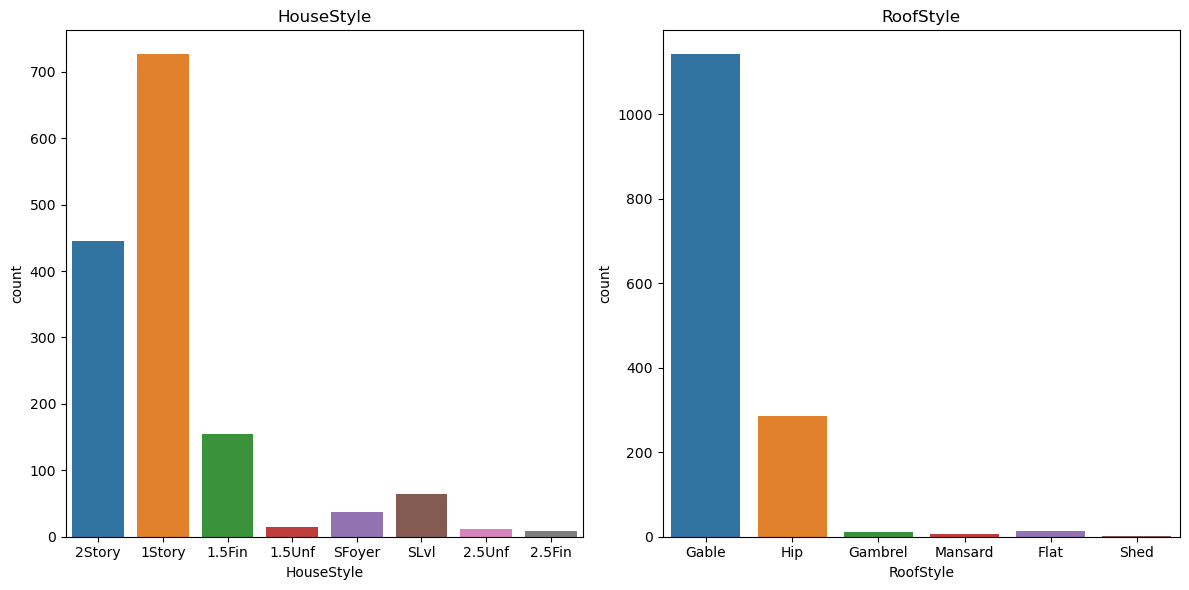

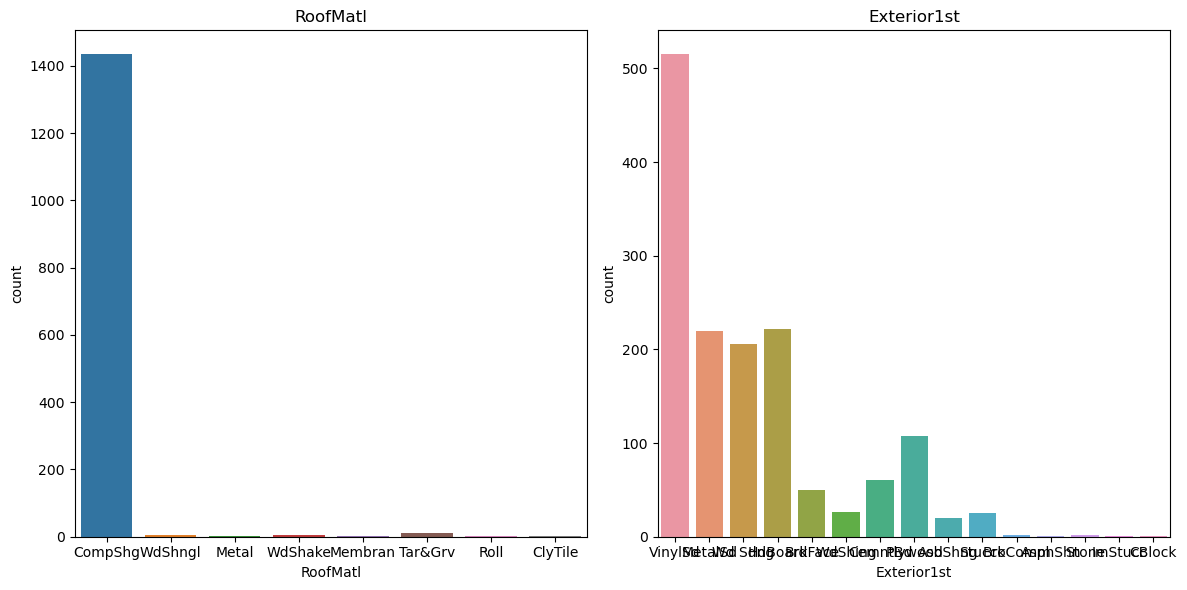

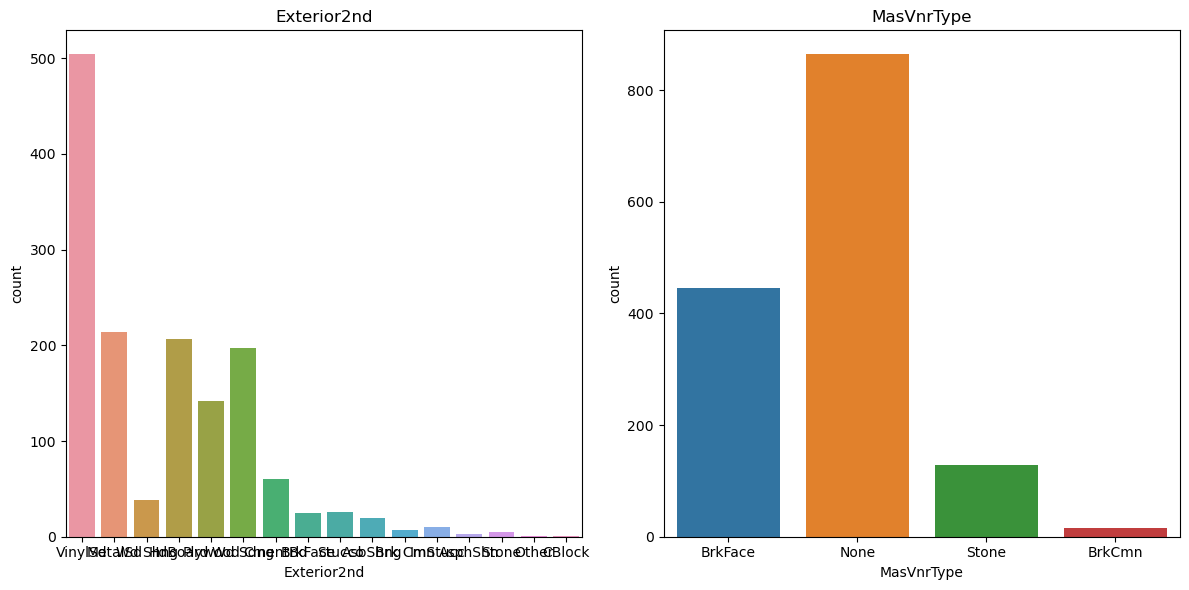

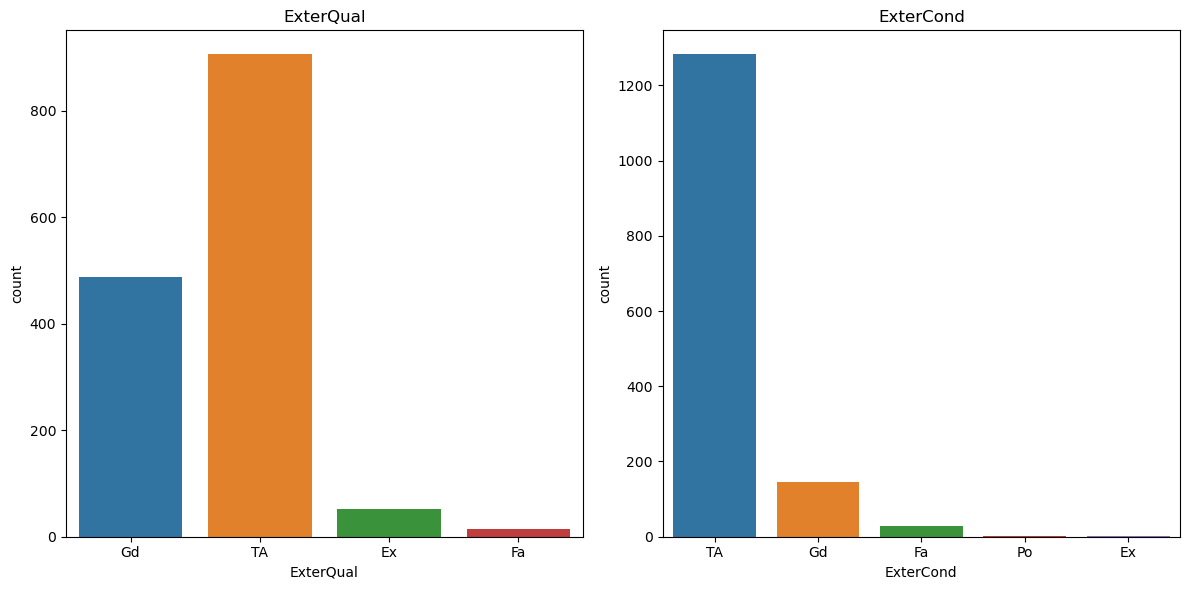

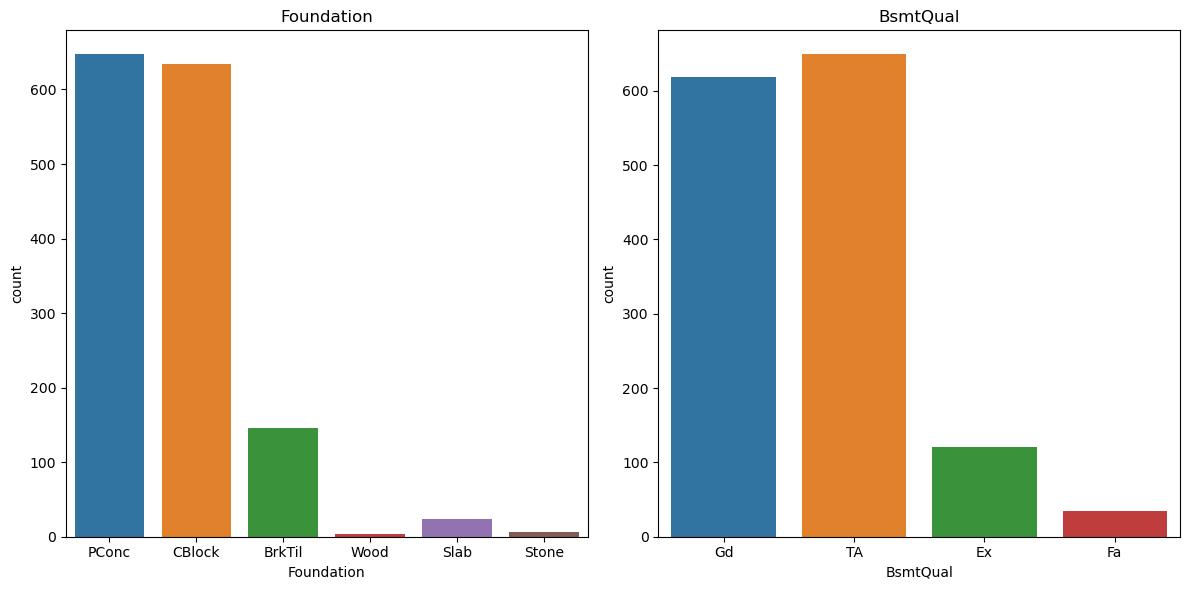

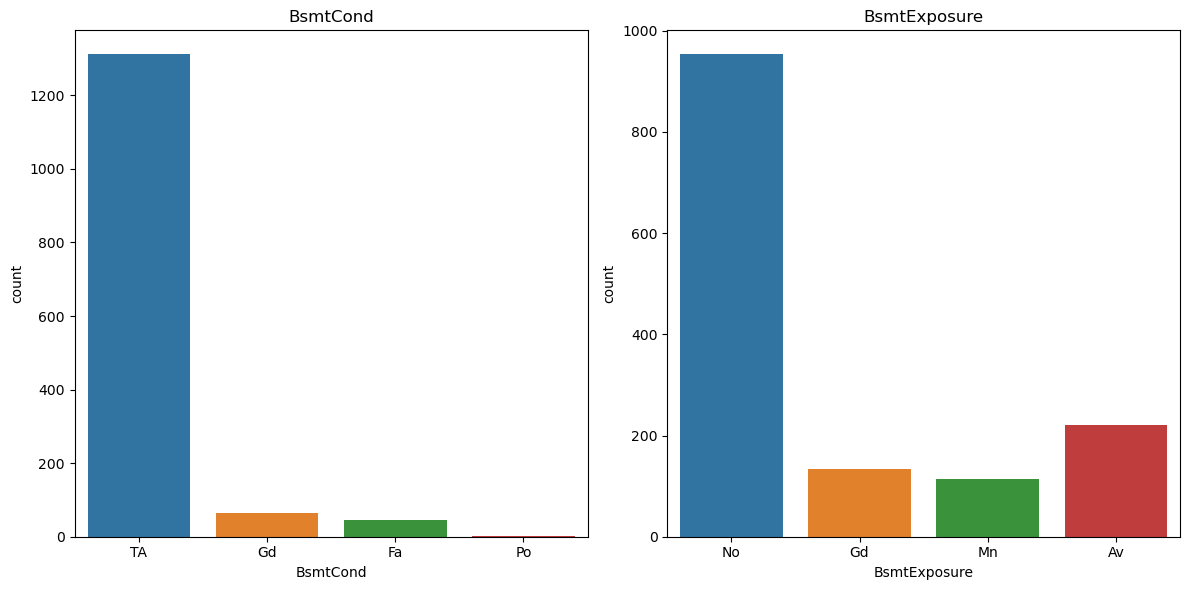

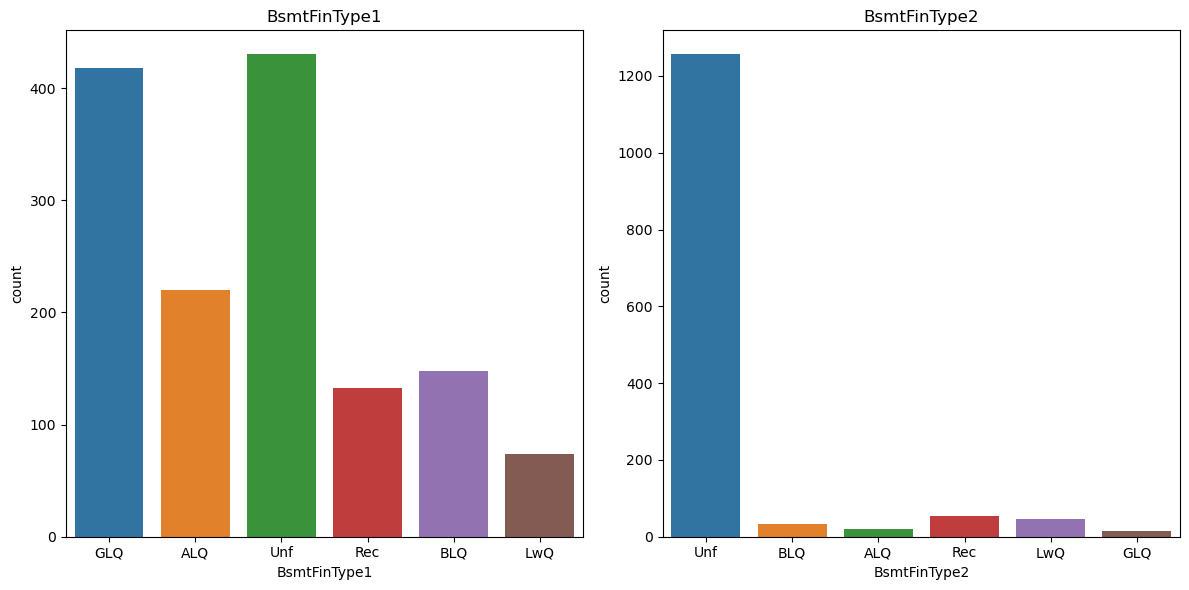

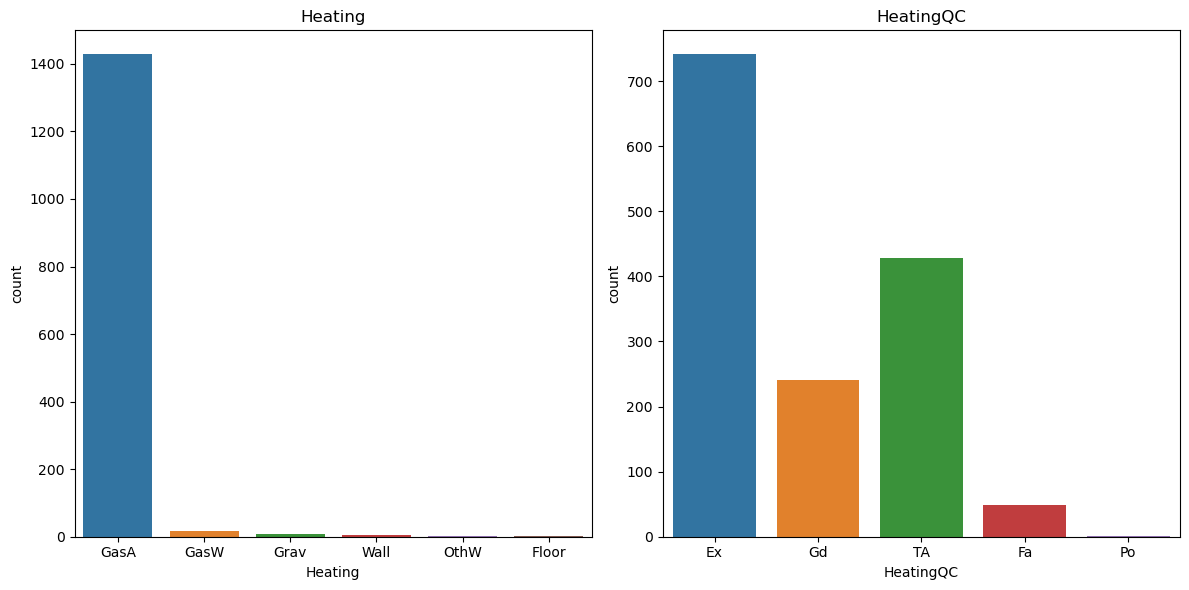

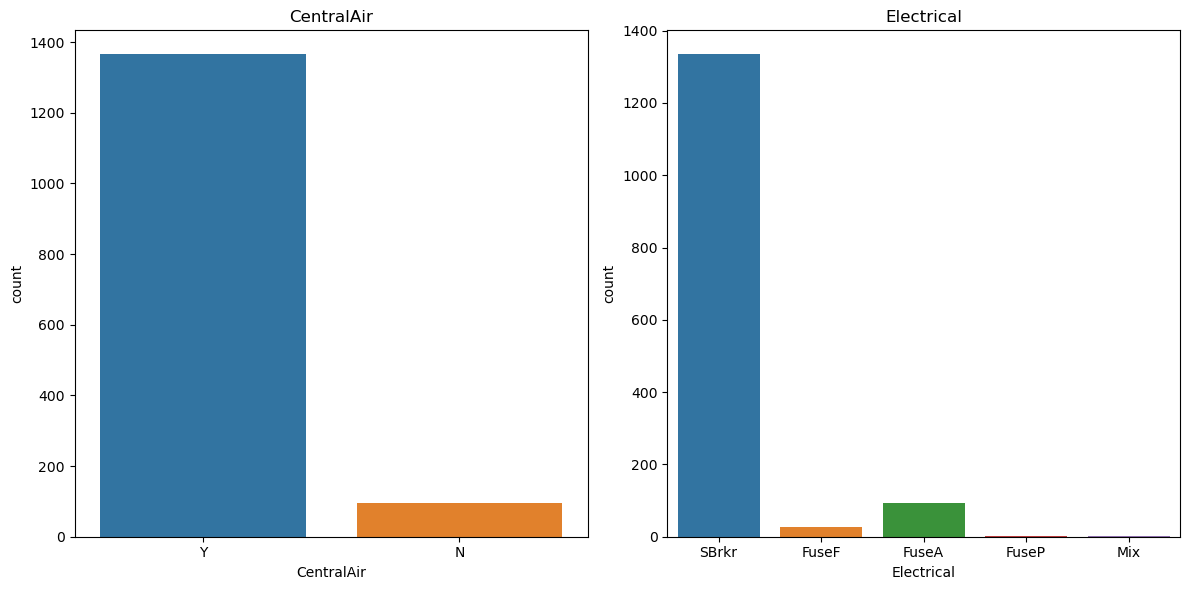

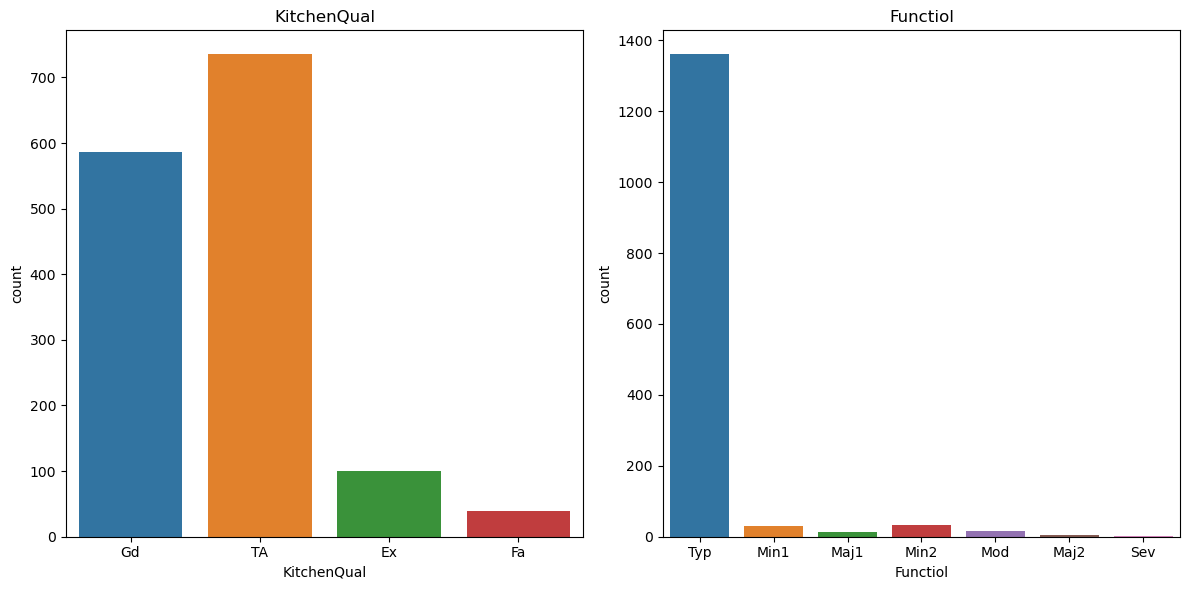

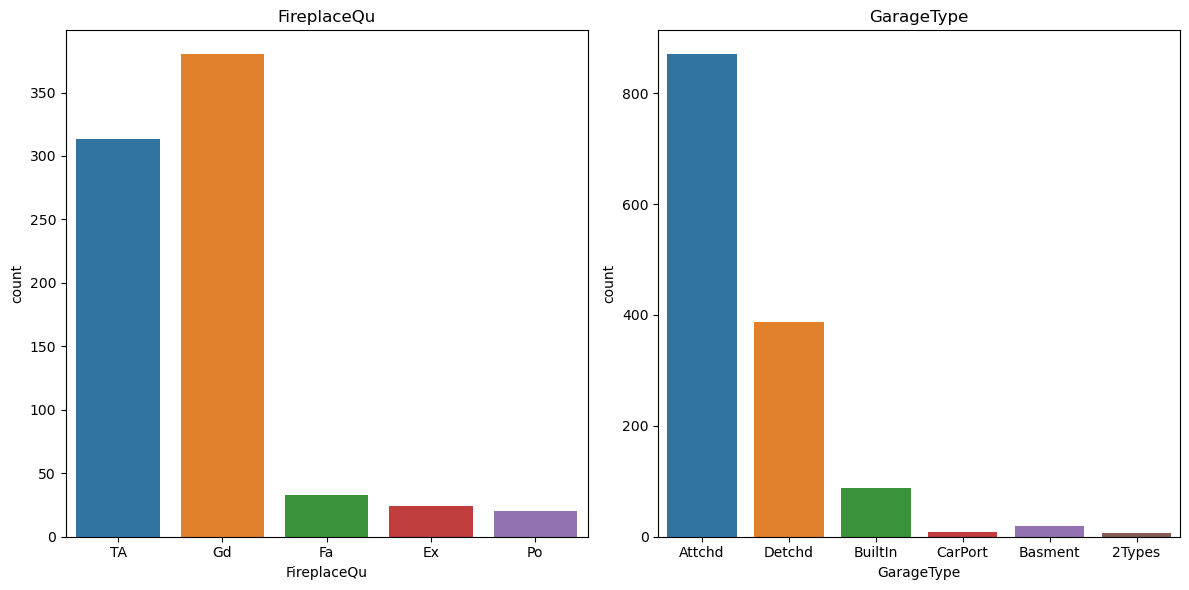

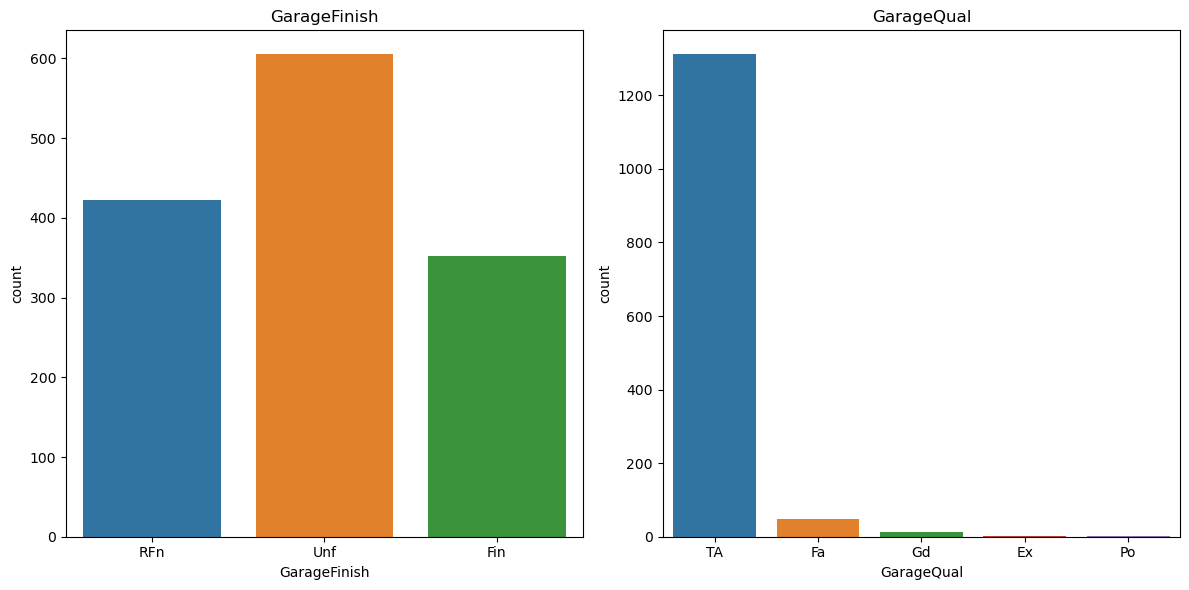

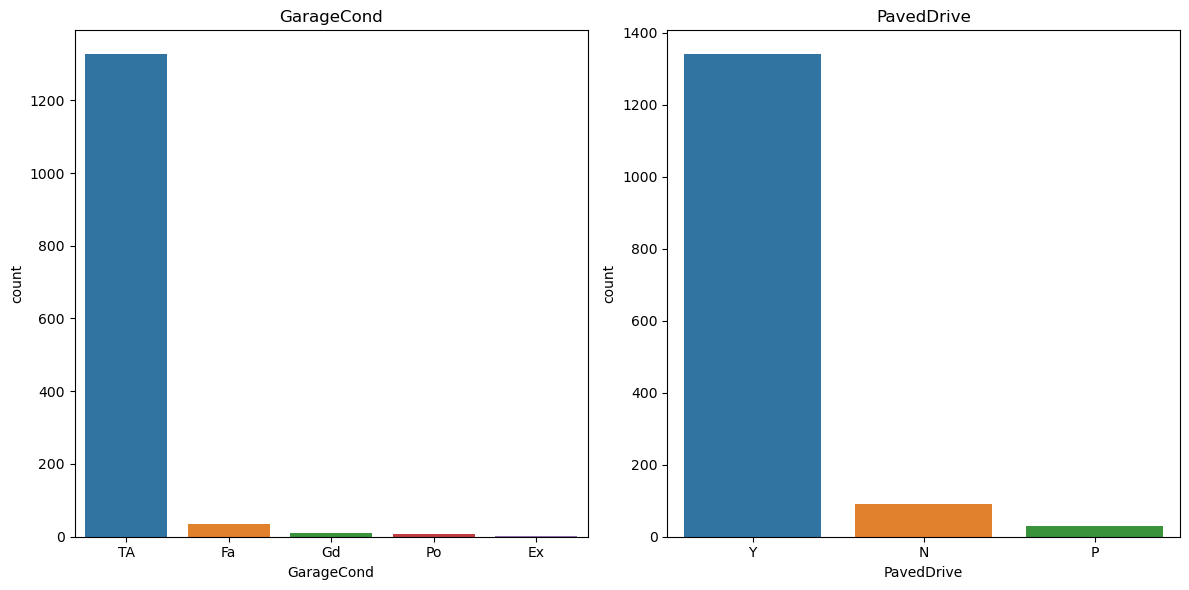

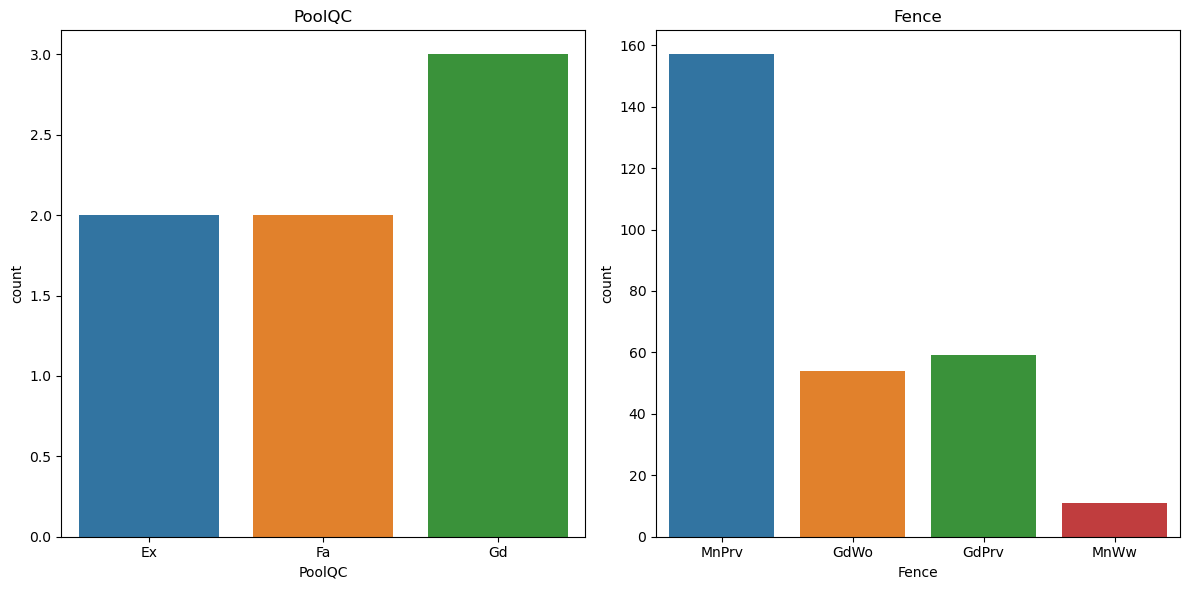

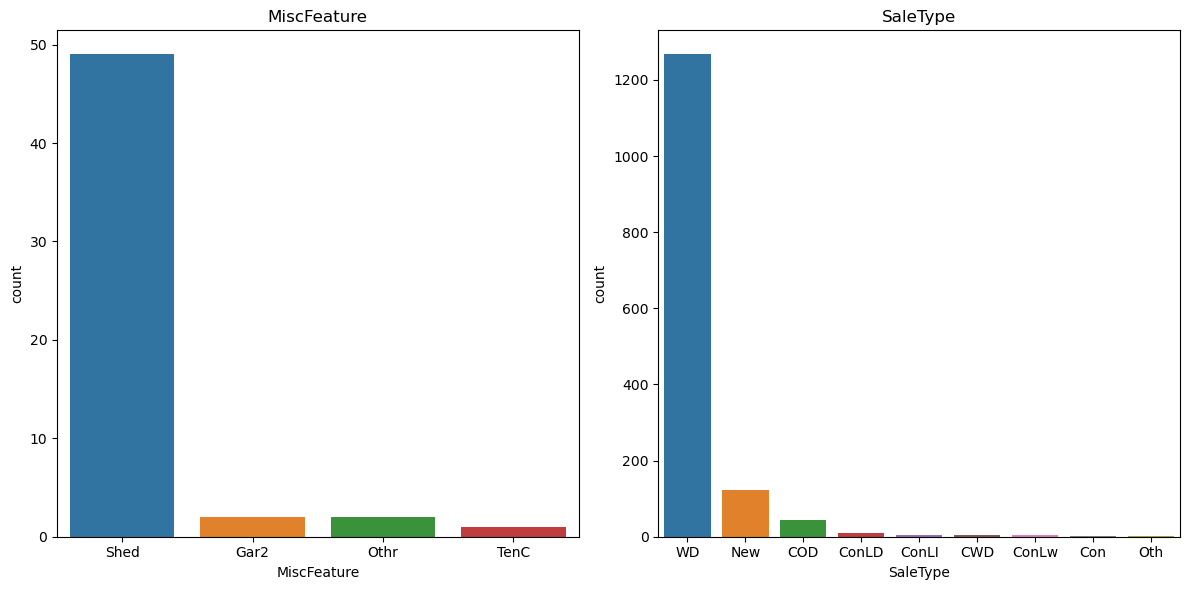

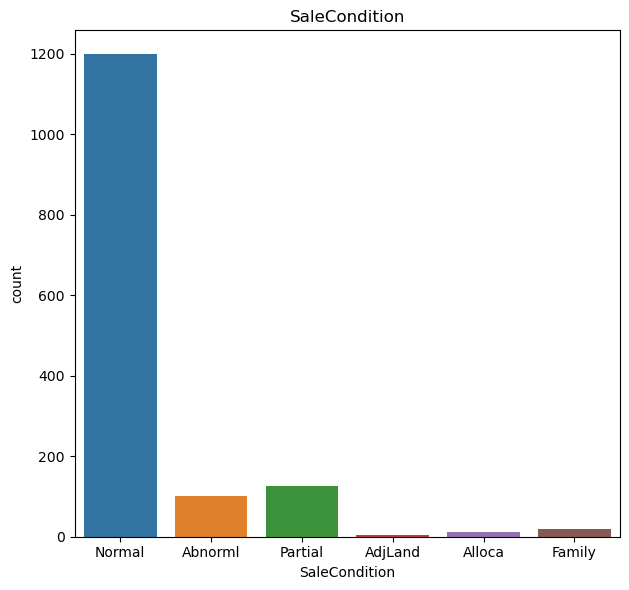

In [11]:
columnas_categoricas = df.select_dtypes(include=['object', 'string']).columns

# Itera sobre las columnas categóricas en pasos de 2
for i in range(0, len(columnas_categoricas), 2):
    # Crea una figura con dos subgráficos en una fila
    plt.figure(figsize=(12, 6))

    # Primer subgráfico: antes de la eliminación de anomalías
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=columnas_categoricas[i])
    plt.title(f"{columnas_categoricas[i]}")

    # Verifica si hay una siguiente columna antes de intentar acceder a ella
    if i + 1 < len(columnas_categoricas):
        # Segundo subgráfico: después de la eliminación de anomalías
        plt.subplot(1, 2, 2)
        sns.countplot(data=df, x=columnas_categoricas[i + 1])
        plt.title(f"{columnas_categoricas[i + 1]}")

    # Ajustar el espaciado entre los subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

## Tratamiento de los datos.

### Paso 1: Crear un límite para eliminar los datos nulos, mostrar las variables que harán eliminación a sus nulos y mostrar los conteos antes, eliminar los datos nulos y mostrar los conteos de nuevo.

In [12]:
#creando un limite 
limite = len(df)*0.80
print("El limite para eliminar una columna ", limite)

#Antes de la eliminacionde nulos
print(df.isna().sum().sort_values(ascending=False))
#Filtrando columnas con el menos del 80% de datos nulos
columnas_a_mantener = df.columns[df.isna().sum() <= limite]
print("Columnas a mantener:",columnas_a_mantener)
#Eliminando datos nulos en columnas que superan el limite
df_sin_nulos = df[columnas_a_mantener].copy()
#eliminado filas nulos con menos del 5% de los datos
limite = len(df)*0.05
print("El limite para eliminar las filas ", limite)
columnas_a_eliminar = df_sin_nulos.columns[df_sin_nulos.isna().sum() <= limite]
print("Columnas restantes :",columnas_a_eliminar)

#Eliminando datos nulos en columnas que superan el limite
df_sin_nulos_2 = df_sin_nulos.dropna(subset=columnas_a_eliminar).copy()

#Mostrando columnas con nulos restantes
print("Columnas despues de eliminar los nulos menores al limite")
# Mostrar solo las columnas con más de 0 valores nulos
print(df_sin_nulos_2.isna().sum().sort_values(ascending=True)[df_sin_nulos_2.isna().sum() > 0])


El limite para eliminar una columna  1168.0
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64
Columnas a mantener: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', '

### Paso 2: Si existen nulos aún, dependiendo de la gráficas anteriores, determinar si hay que imputar por medio de la moda, la mediana o la media; realizar la imputación.

In [13]:
columnas_object = df_sin_nulos_2.select_dtypes(include=['object']).columns

# Inputando la moda en columnas de tipo Objeto
for columna in columnas_object:
    moda = df_sin_nulos_2[columna].mode()[0]  # Calcular la moda
    df_sin_nulos_2[columna].fillna(moda, inplace=True) 

columnas_float = df_sin_nulos_2.select_dtypes(include=['float']).columns

# Imputando la mediana alas columnas de tipo float
for columna in columnas_float:
    mediana = df_sin_nulos_2[columna].median()
    df_sin_nulos_2[columna].fillna(mediana, inplace=True)

#Comprobacion
print(df_sin_nulos_2.isna().sum().sort_values(ascending=True))

Id              0
Functiol        0
TotRmsAbvGrd    0
KitchenQual     0
KitchebvGr      0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 77, dtype: int64


### Paso 2.1 Eliminar columnas no relevantes antes de eliminar anomalias

In [14]:
# Filtrando columnas con menos del 70% de datos iguales a 0
columnas_a_mantener = df_sin_nulos_2.columns[(df_sin_nulos_2 == 0).mean() <= 0.70]
print("Columnas a mantener:", columnas_a_mantener)
df_sin_ceros = df_sin_nulos_2[columnas_a_mantener].copy()

columnas_a_eliminar = df_sin_nulos_2.columns[~df_sin_nulos_2.columns.isin(columnas_a_mantener)]
print("Columnas eliminadas:", columnas_a_eliminar)

#Eliminando columnas no revlevantes para este anilisis
columnas_a_eliminar=["GarageQual","GarageCond","RoofMatl","Exterior1st","Exterior2nd","ExterQual","ExterCond",
                    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1 ","BsmtFinType2","Condition1","Condition2","HeatingQC","Electrical"]

columnas_a_mantener=df_sin_ceros.columns[~df_sin_ceros.columns.isin(columnas_a_eliminar)]

df_filtrado = df_sin_ceros[columnas_a_mantener].copy()
display(df_filtrado)

Columnas a mantener: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,548,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2,460,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2,608,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,3,642,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3,836,Y,192,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2,460,Y,0,40,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2,500,Y,349,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,1,252,Y,0,60,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,1,240,Y,366,0,4,2010,WD,Normal,142125


### Paso 3: Analizar los datos numéricos, determinar si hay anomalías y utilizar el rango intercuartílico para tratarlos, mostrar gráficos antes y después del tratamiento, debe verse si la distribución se vio afectada.

In [15]:
columnas_numericas = df_filtrado.select_dtypes(include=[int, float]).columns
print(len(df_filtrado))
# Definir el factor de multiplicación del IQR
factor_iqr = 1.5

df_limpio = df_filtrado.copy()

# Columnas a las que no se aplicará el proceso de eliminación de anomalías
columnas_sin_anomalias = ["BsmtFinSF2","Id","LowQualFinSF","EnclosedPorch","ScreenPorch","3SsnPorch","PoolArea"]

# Itera sobre las columnas numéricas
for columna in columnas_numericas:
    # Verifica si la columna no está en la lista de columnas sin anomalías
    if columna not in columnas_sin_anomalias:
        q3 = df_sin_nulos_2[columna].quantile(0.75)
        q1 = df_sin_nulos_2[columna].quantile(0.25)
        iqr = q3 - q1
        lsuperior = q3 + (factor_iqr * iqr)
        linferior = q1 - (factor_iqr * iqr)
        df_limpio = df_limpio[(df_limpio[columna] >= linferior) & (df_limpio[columna] <= lsuperior)]

1412


887


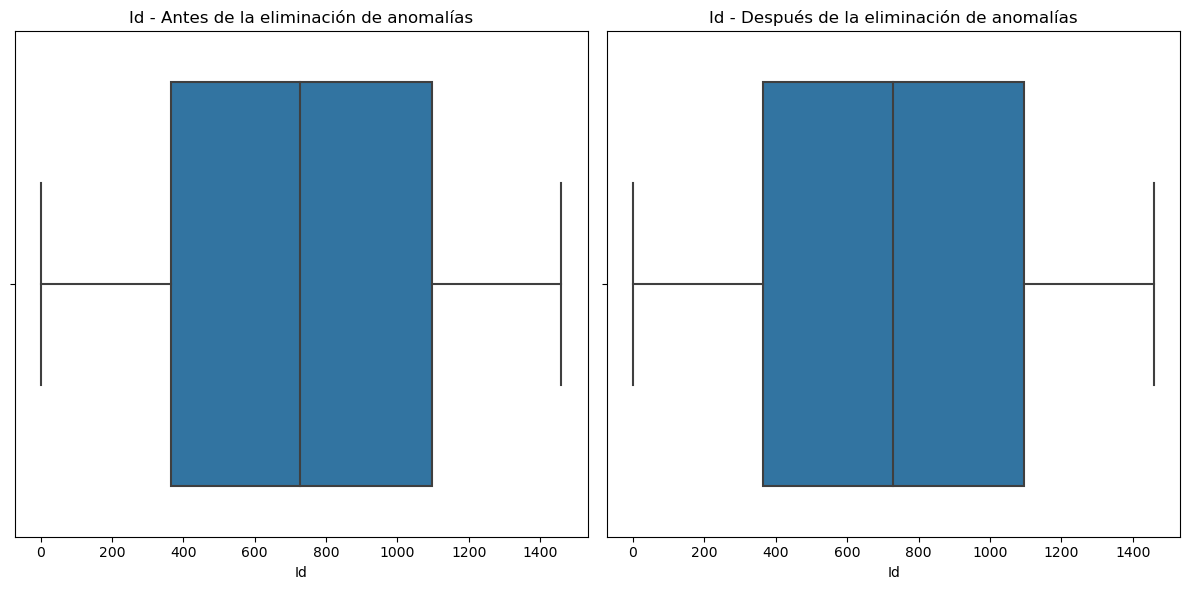

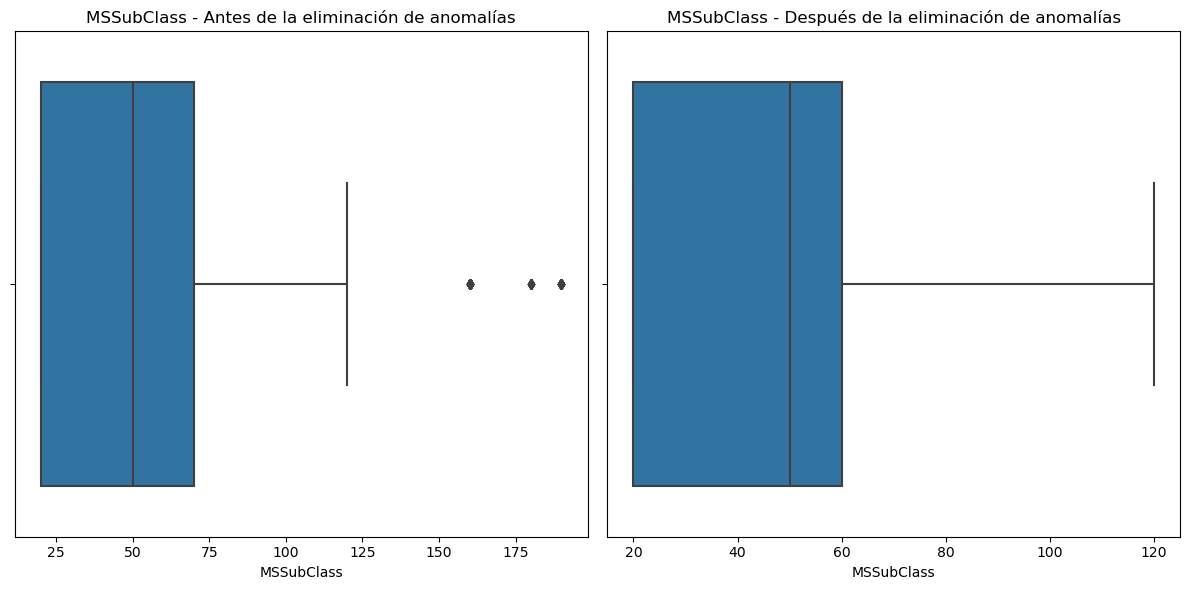

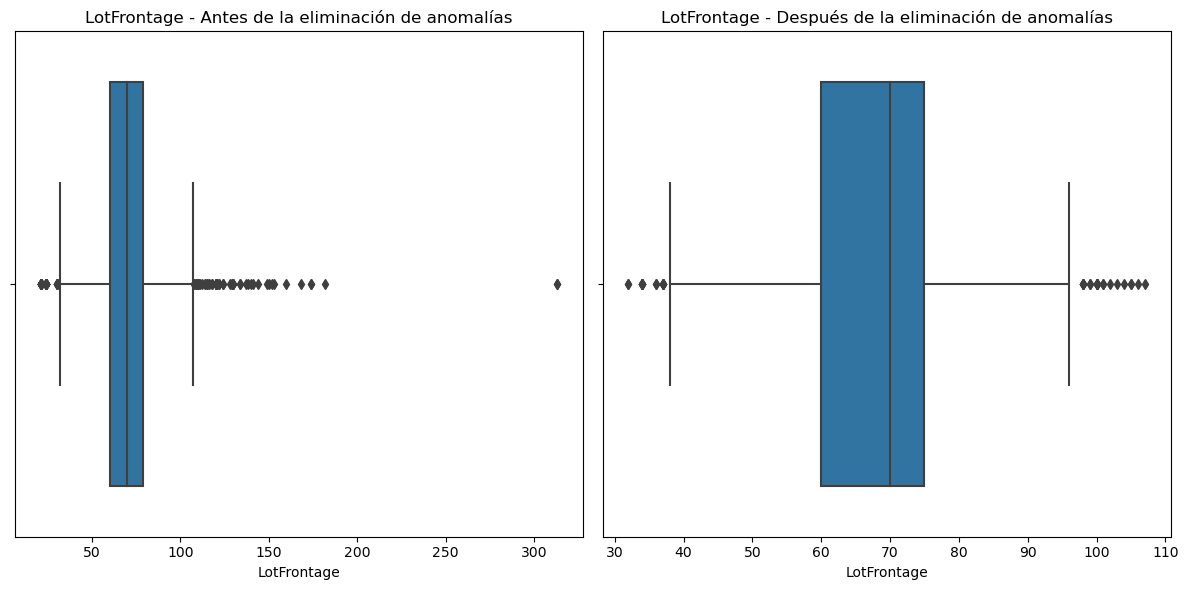

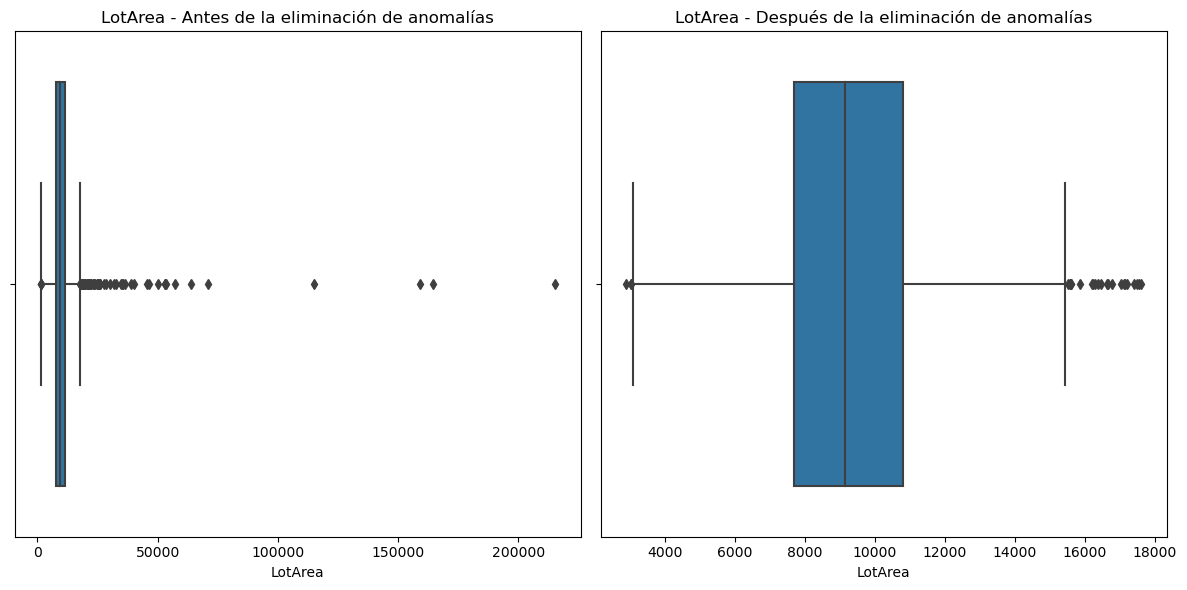

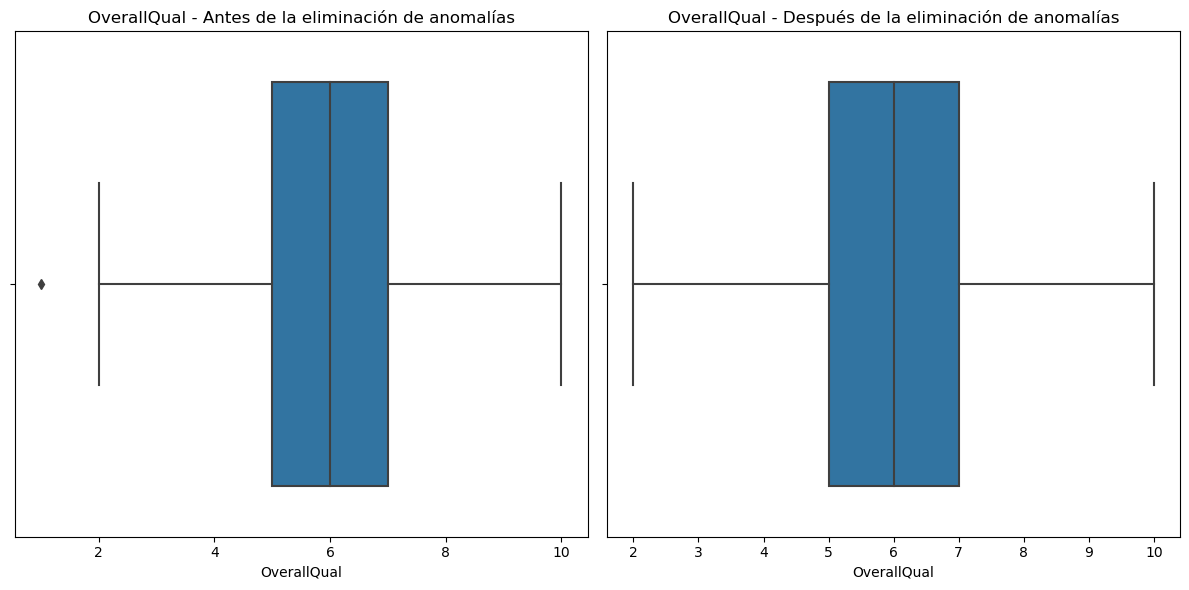

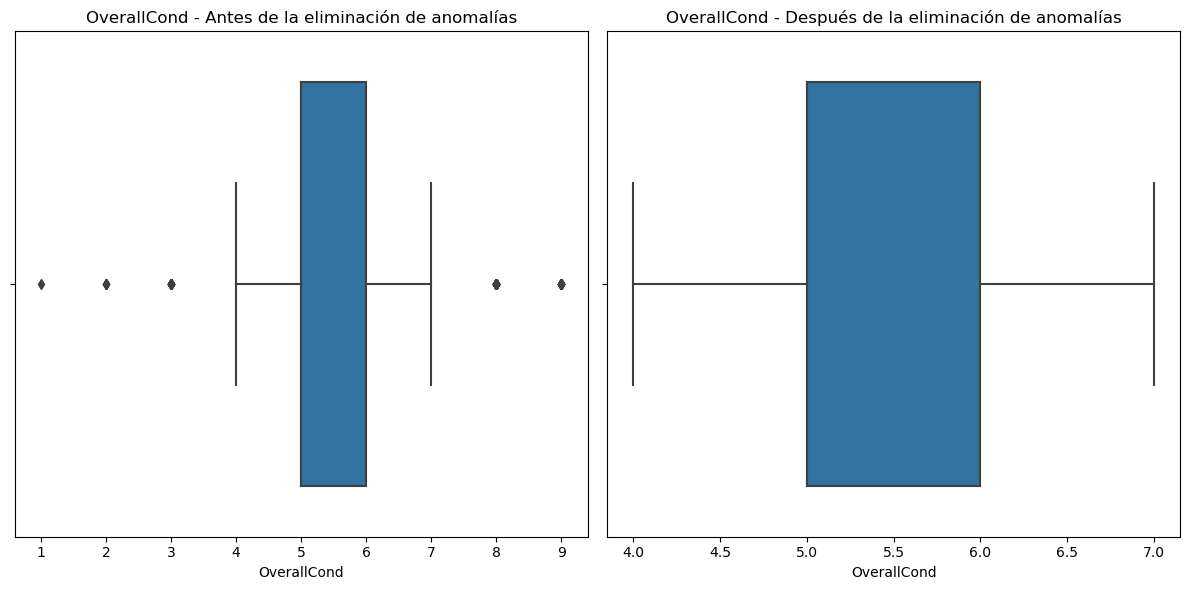

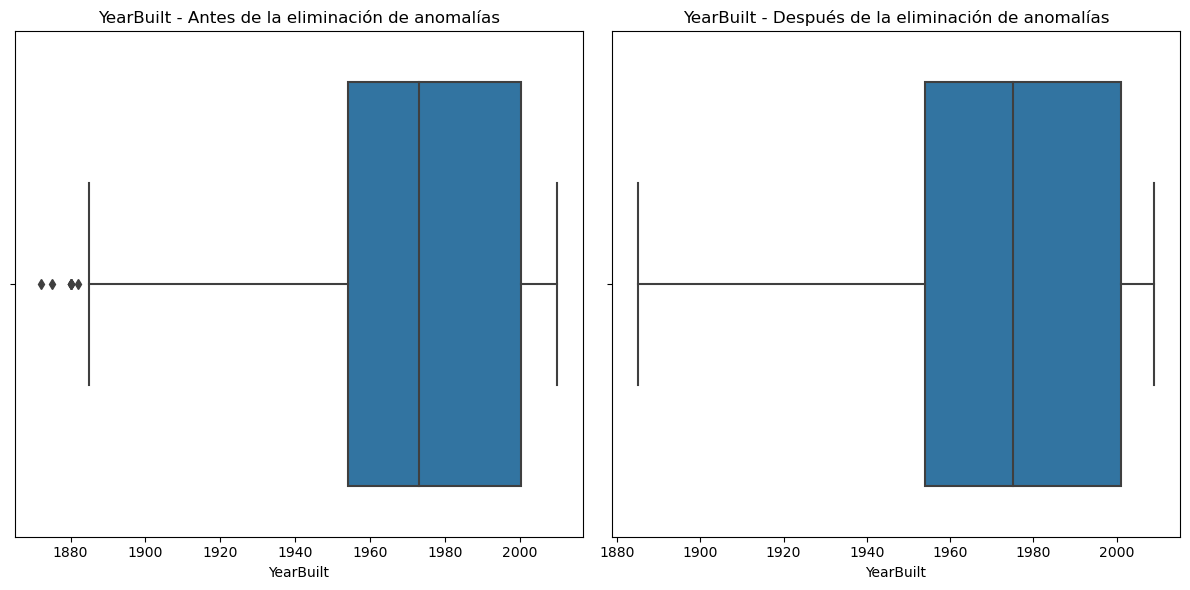

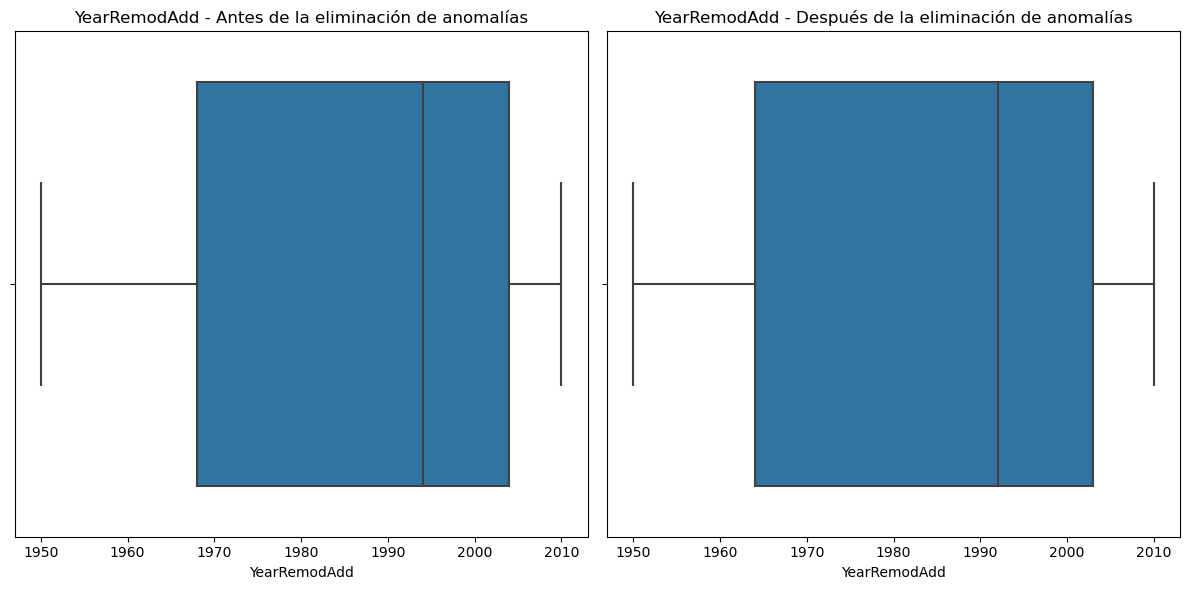

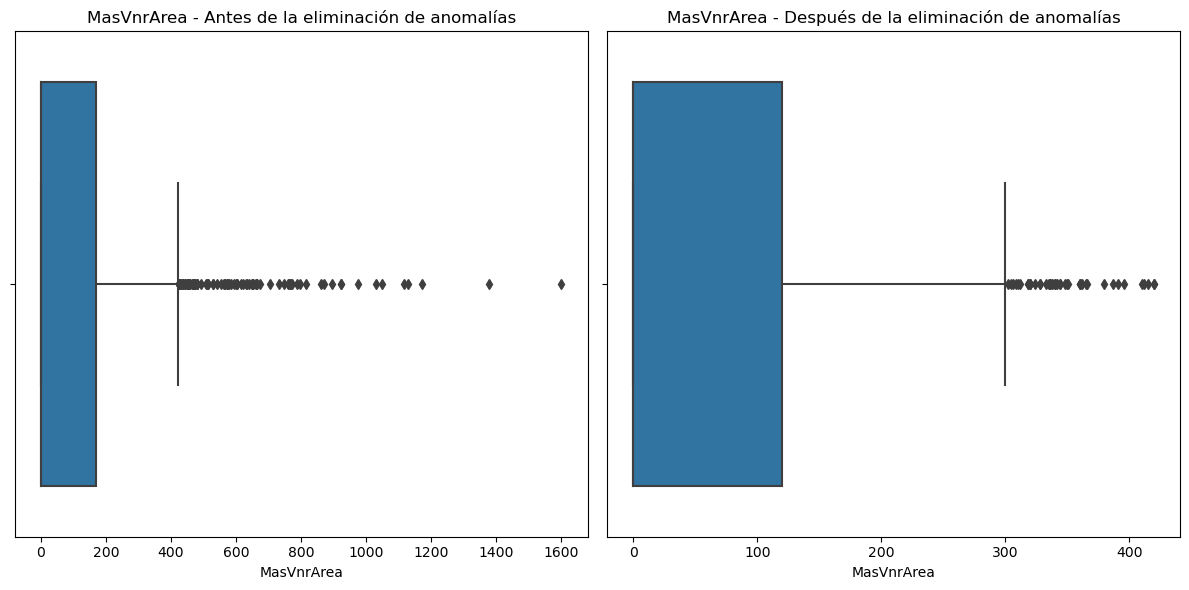

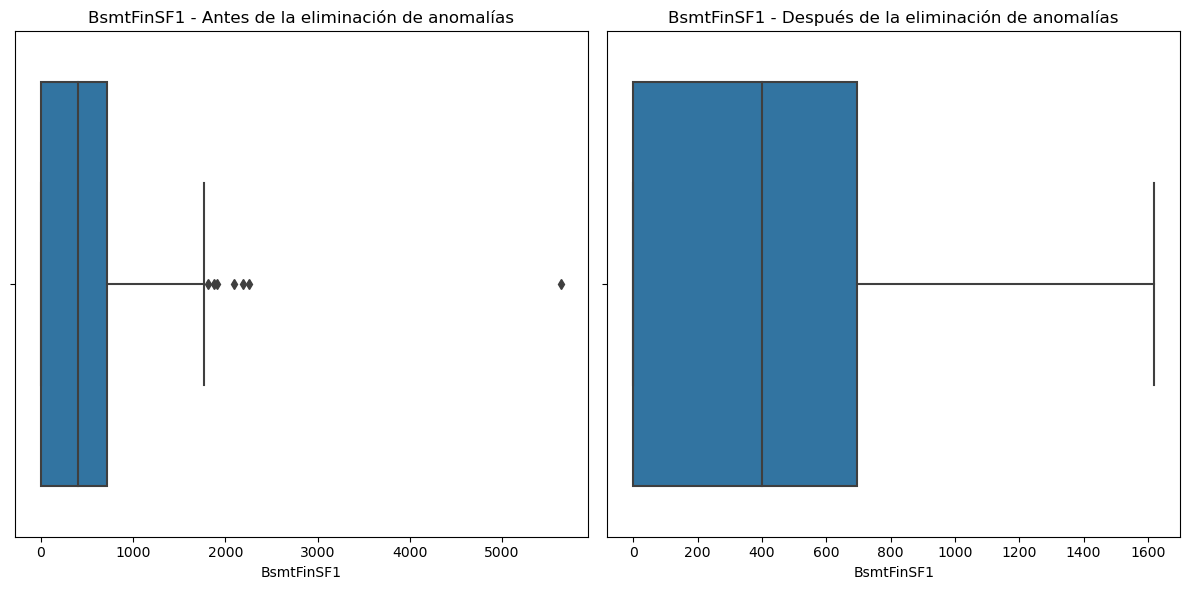

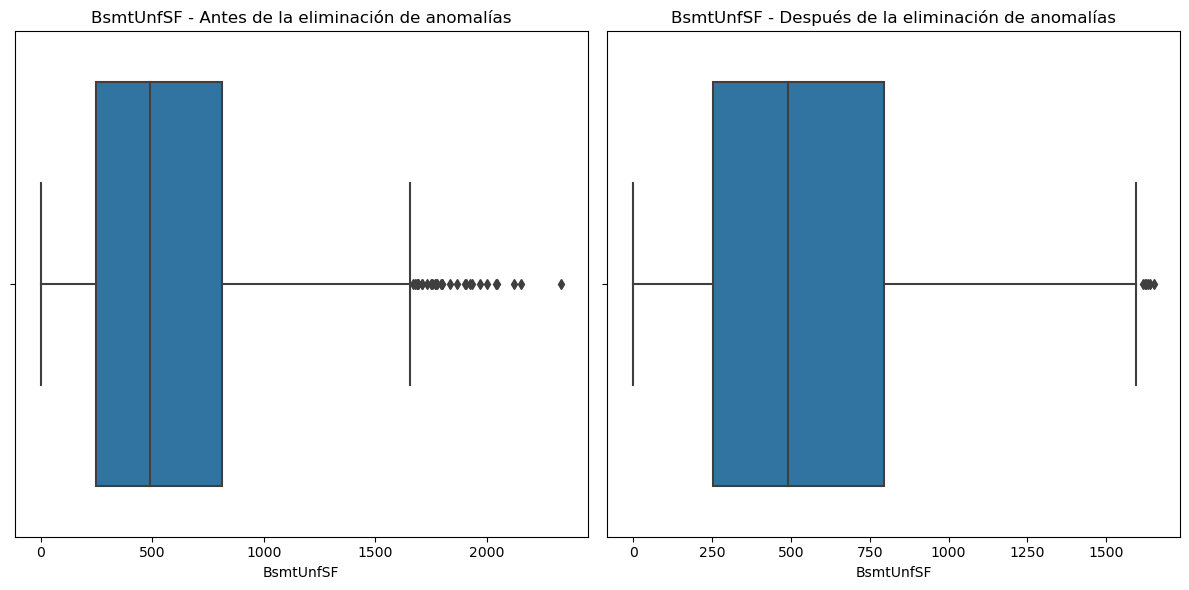

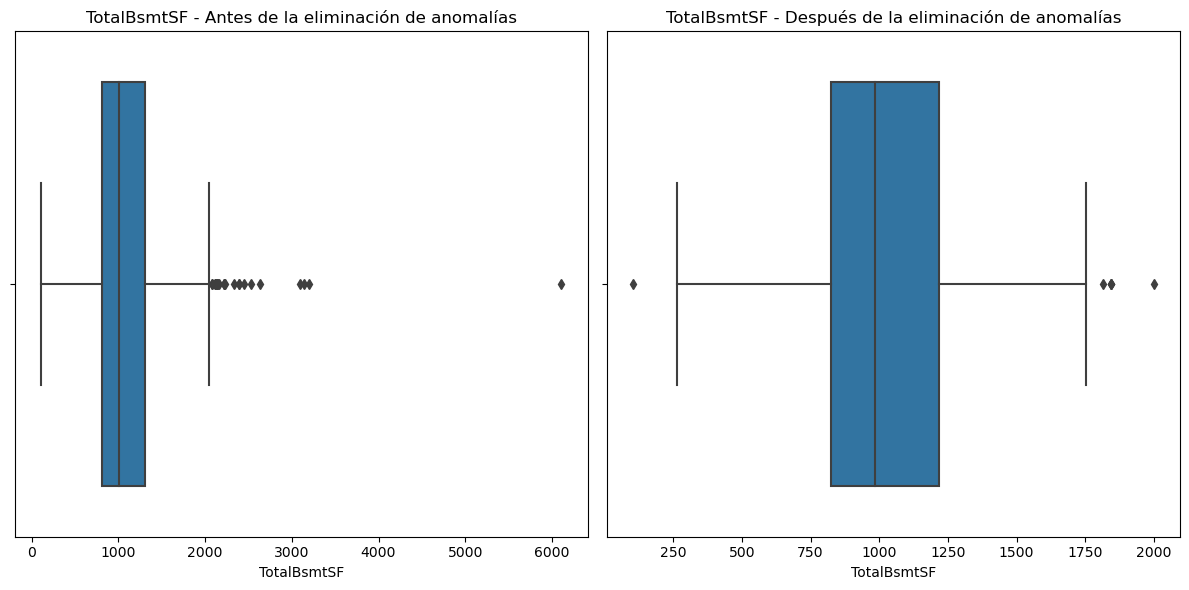

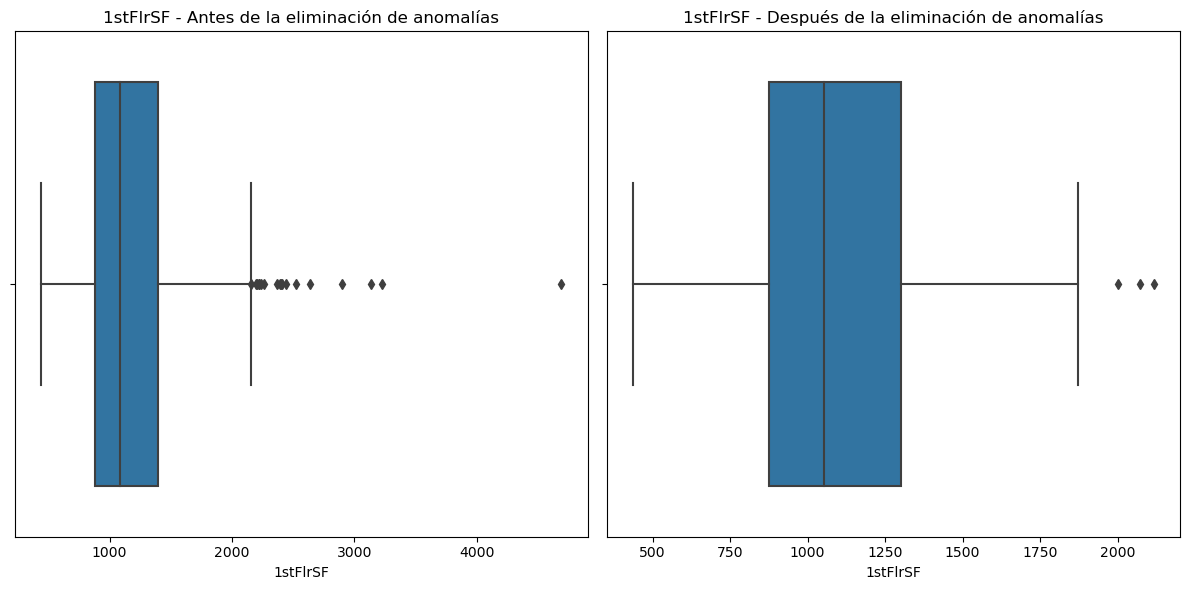

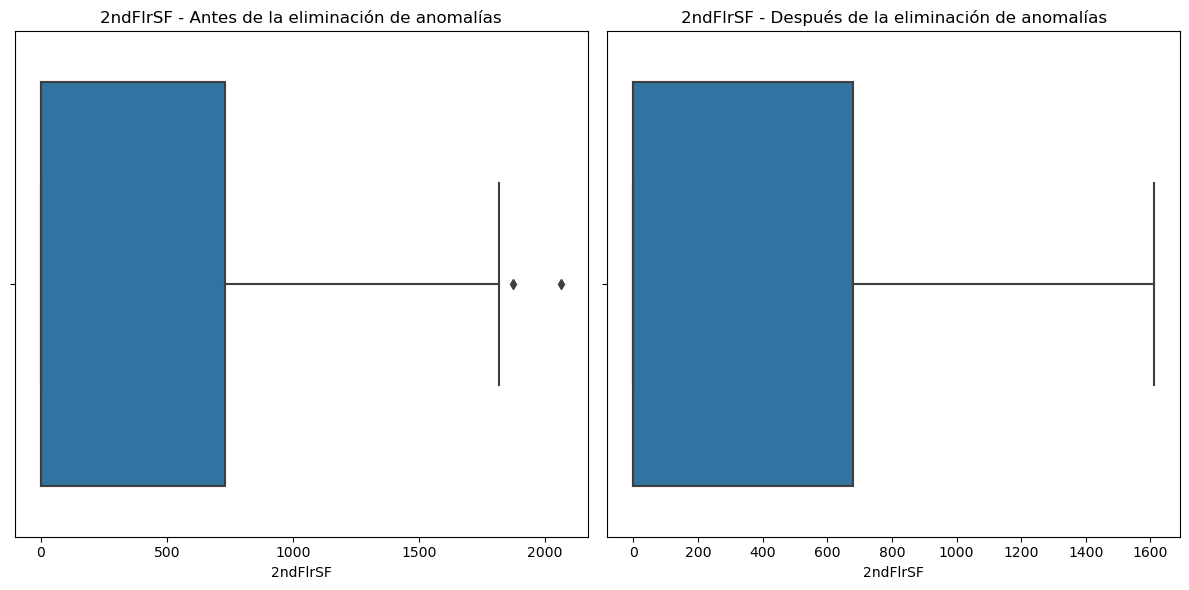

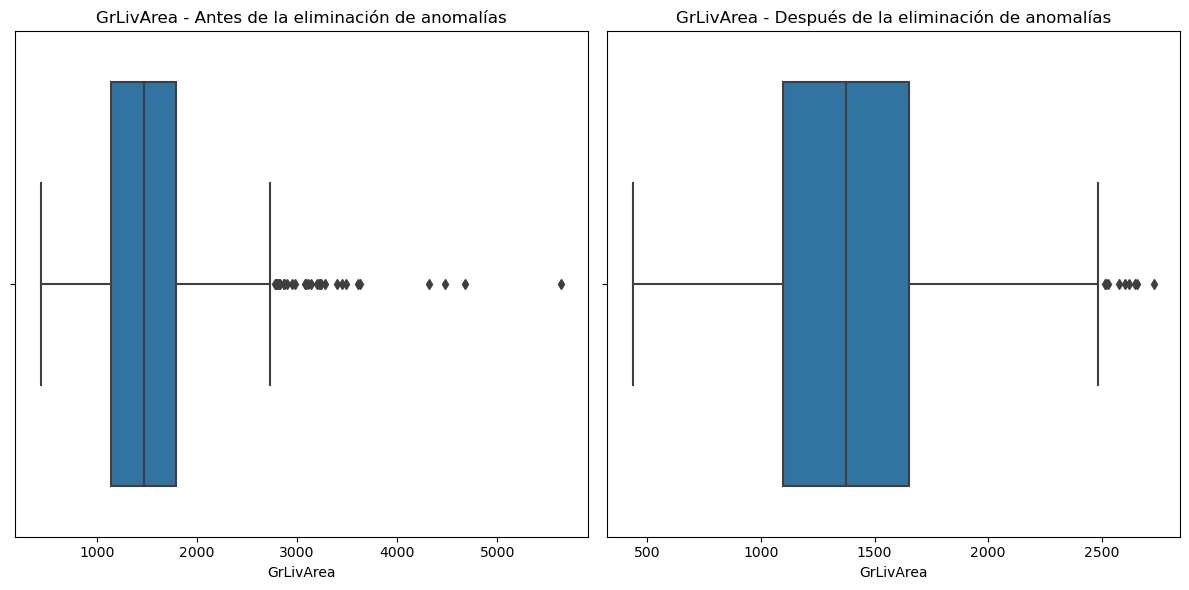

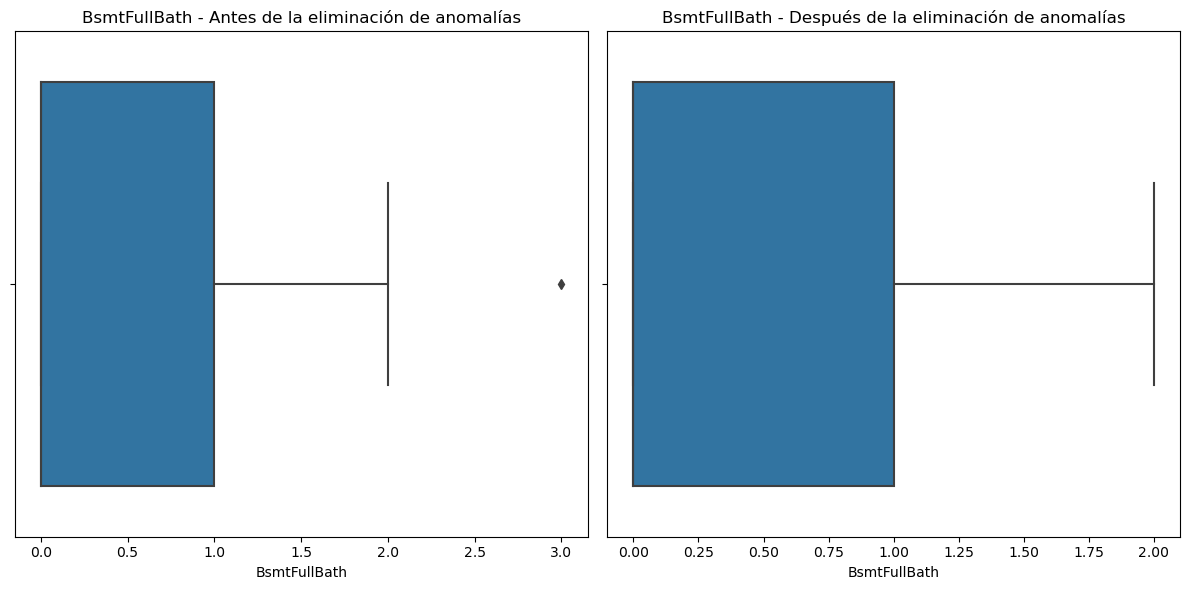

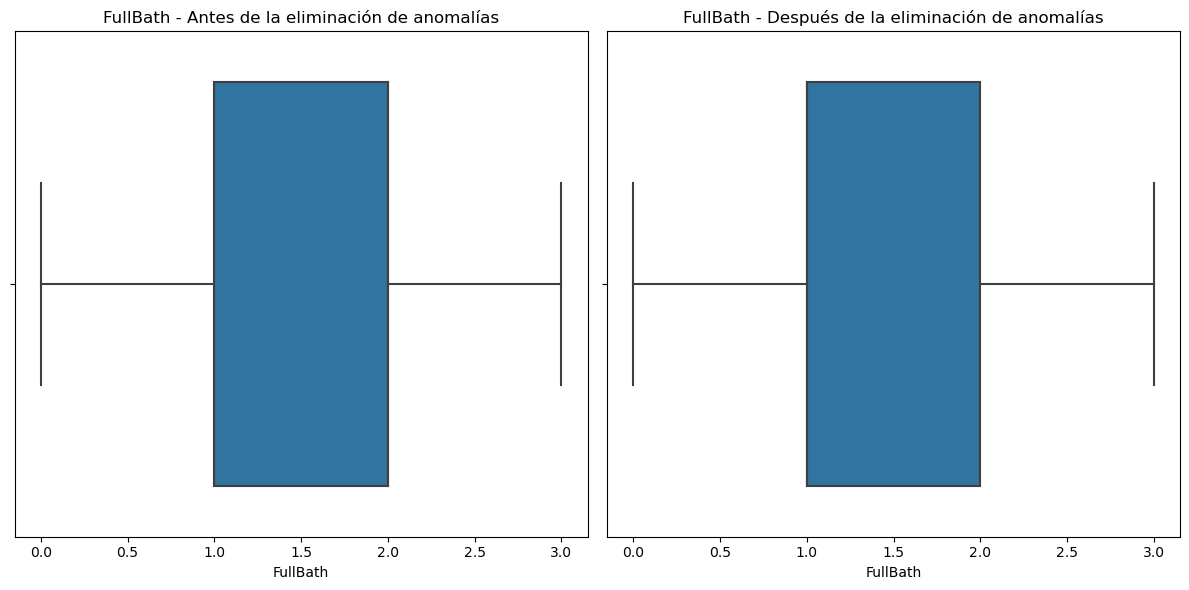

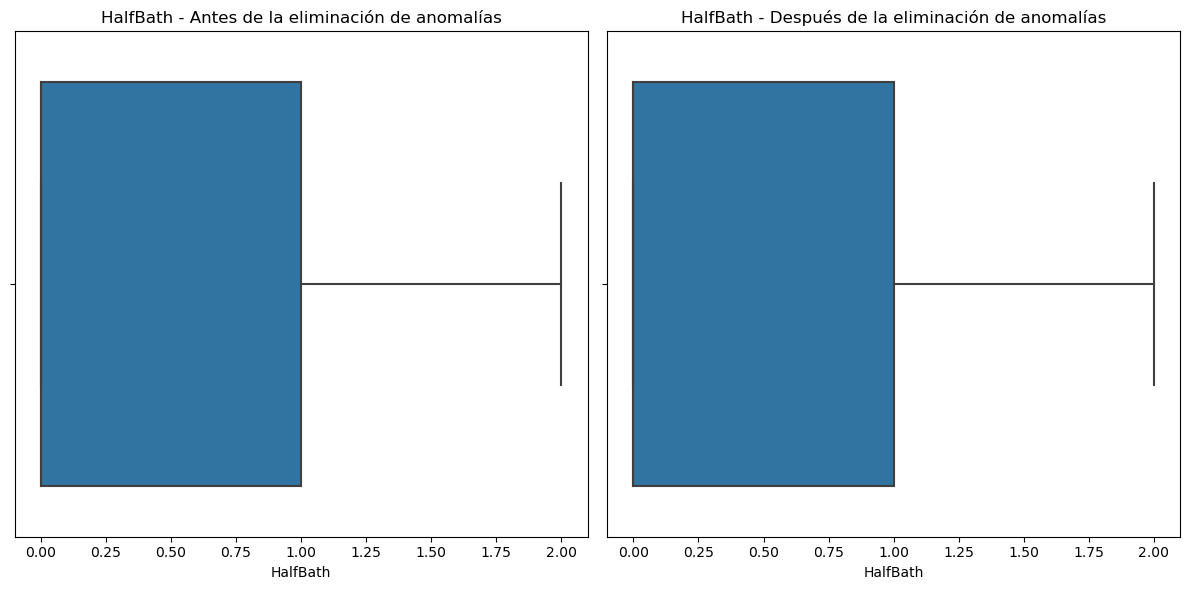

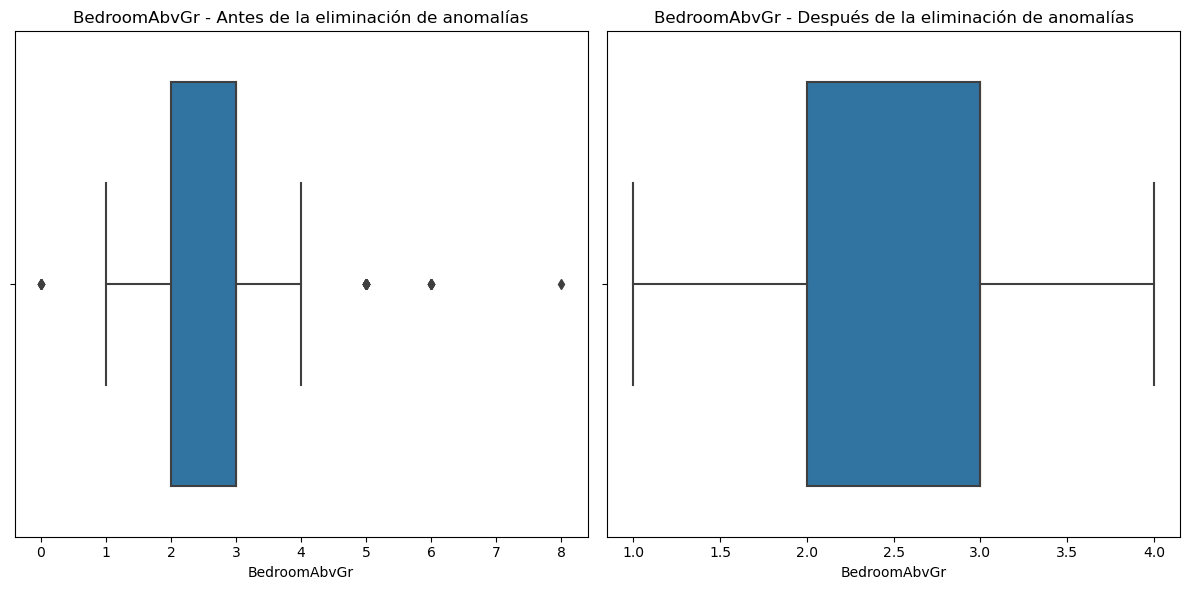

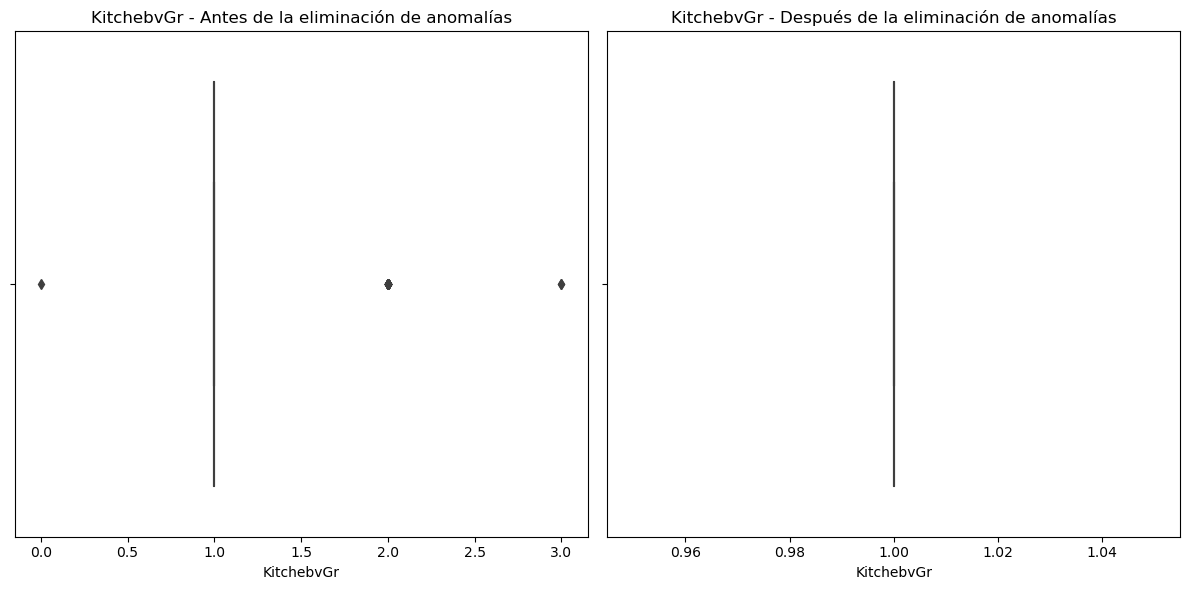

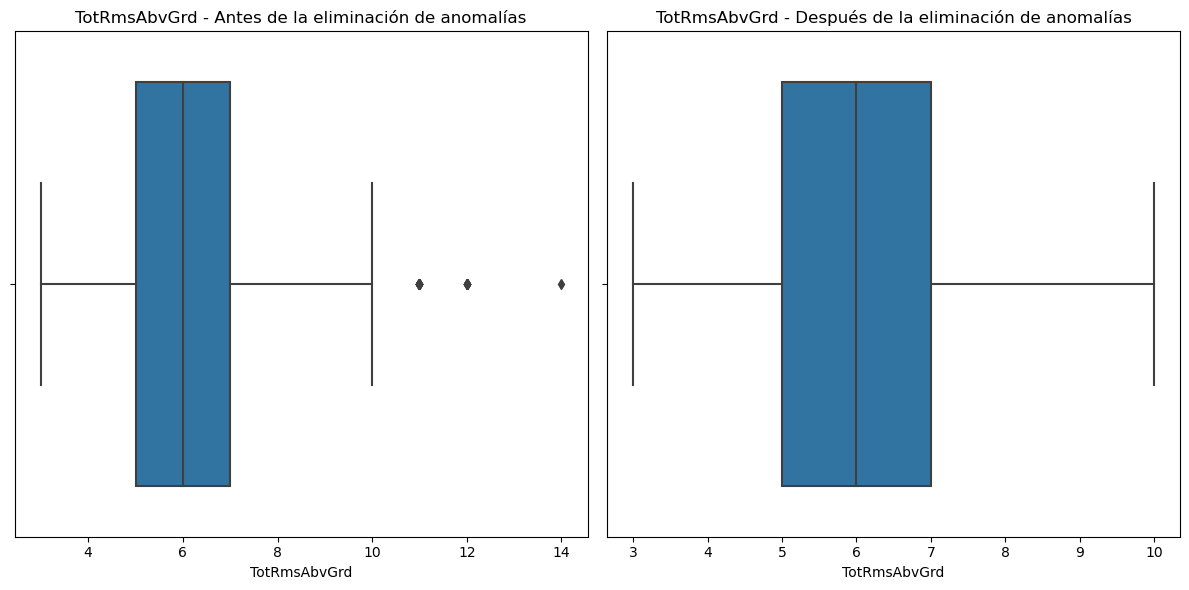

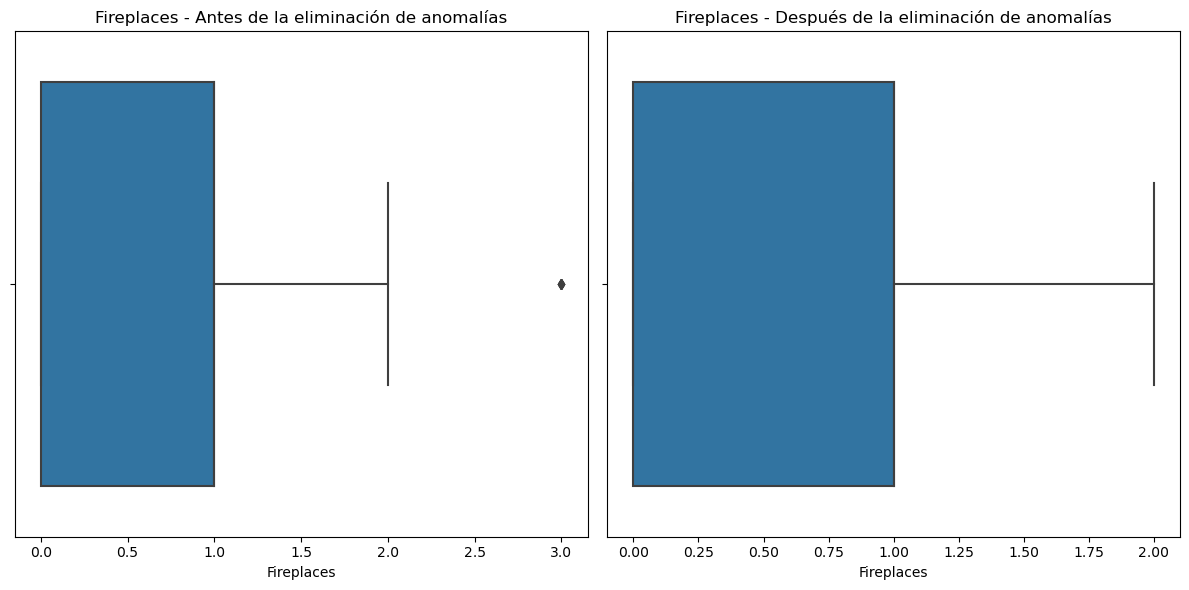

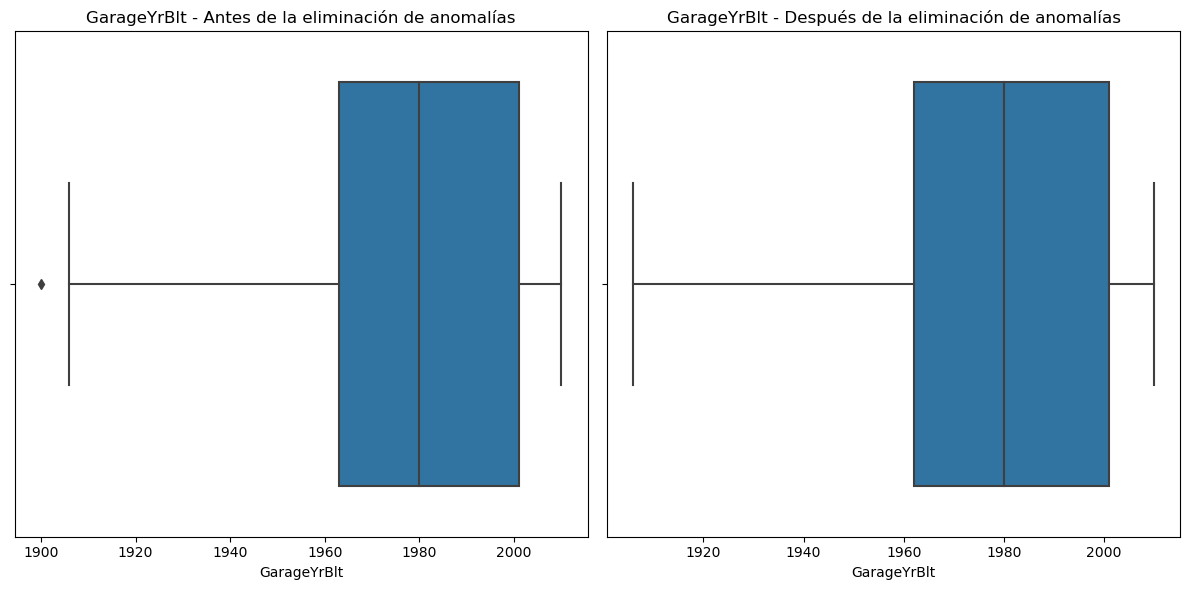

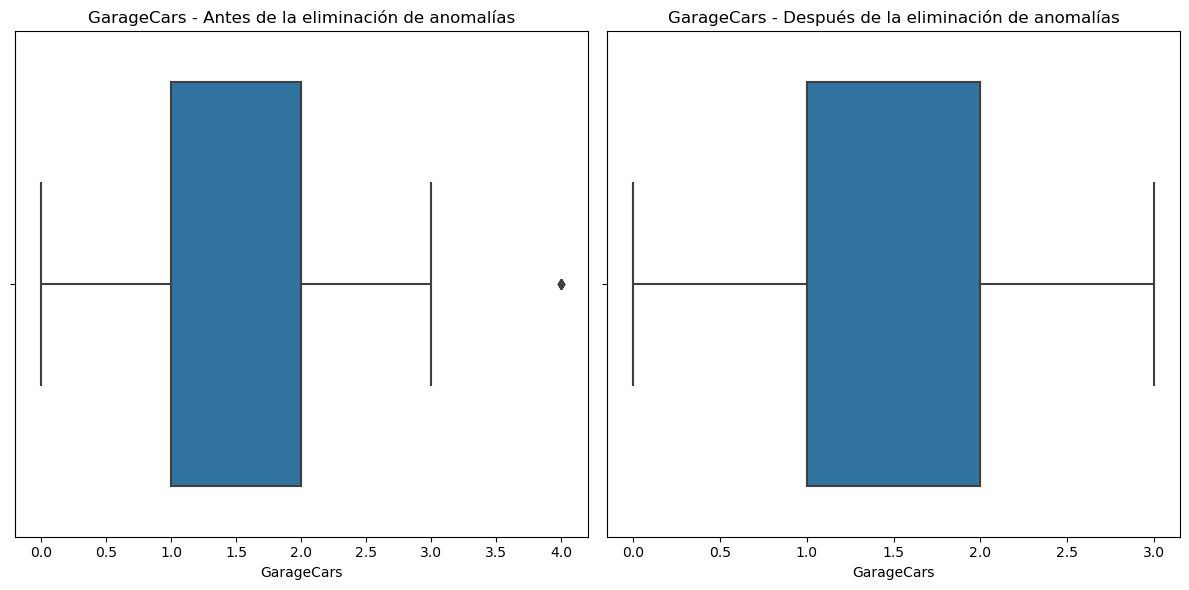

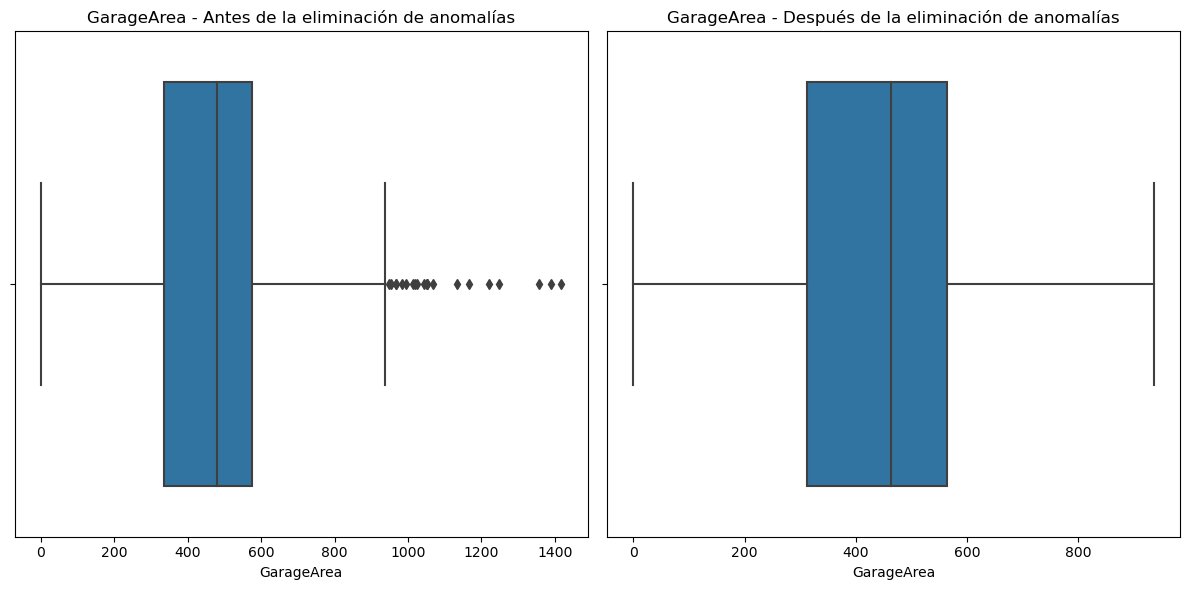

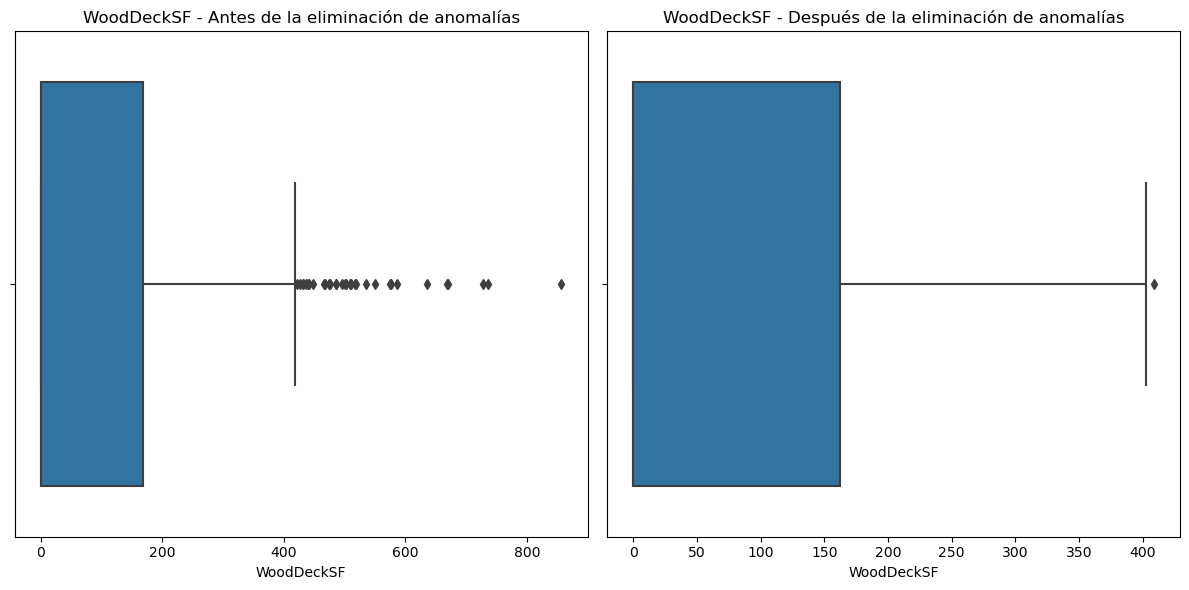

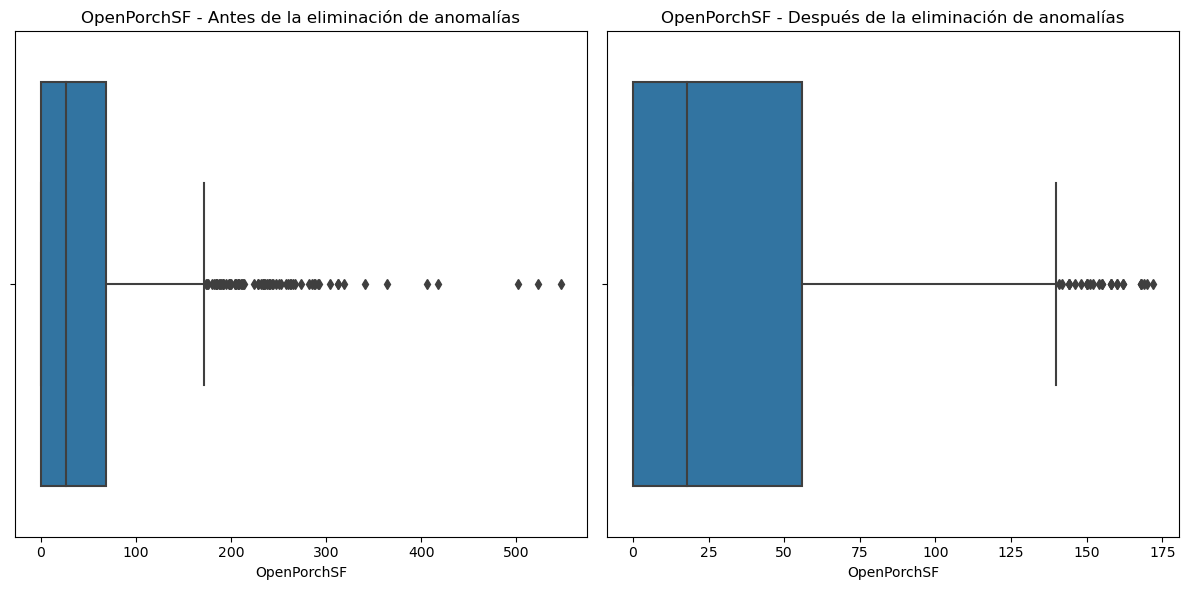

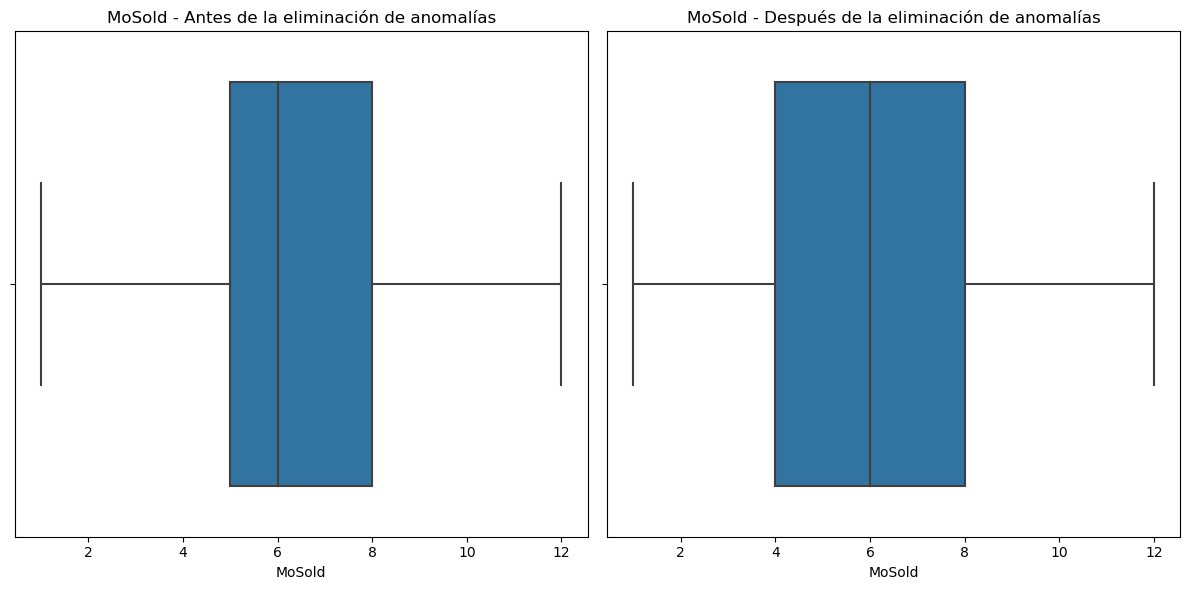

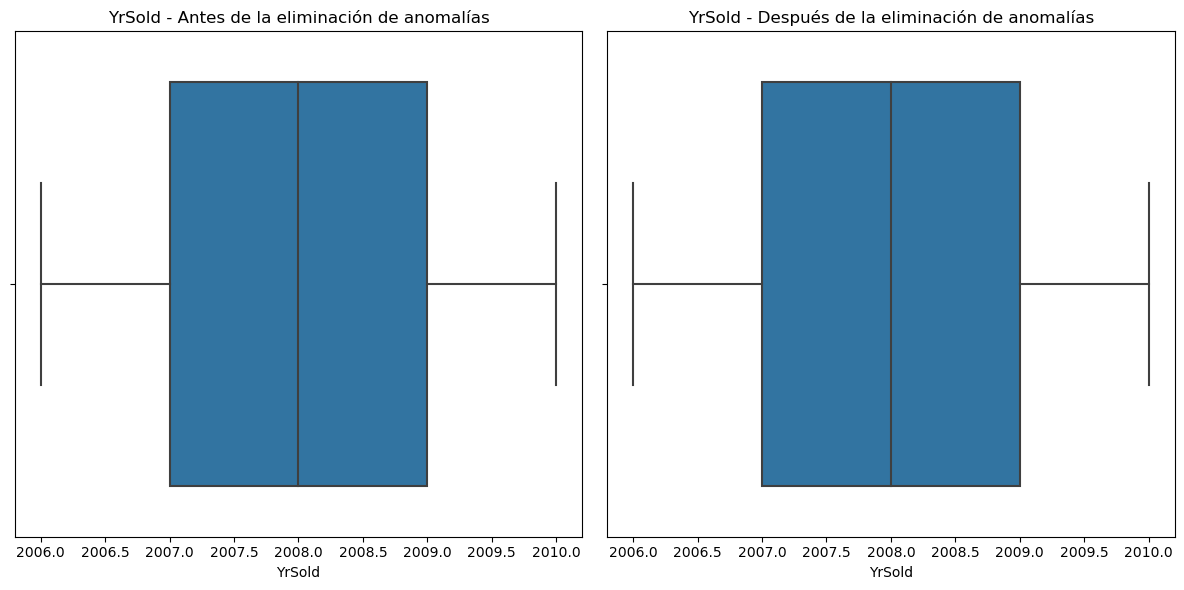

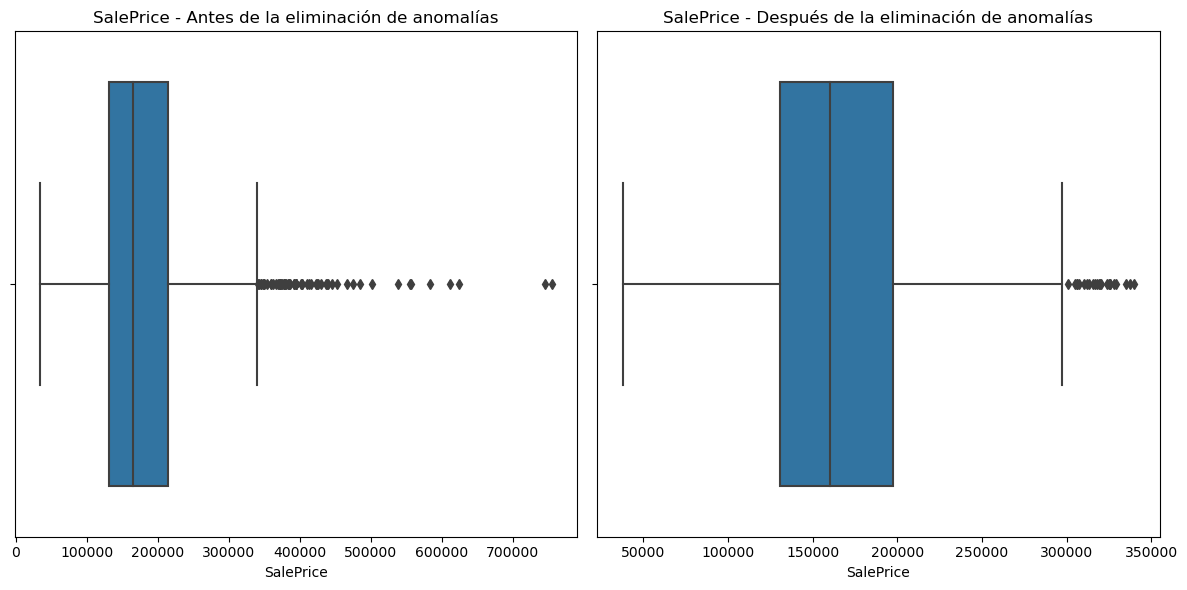

In [16]:
#Mostrar graficas
columnas_numericas = df_limpio.select_dtypes(include=[float, int]).columns
print(len(df_limpio))
# Itera sobre las columnas numéricas
for columna in columnas_numericas:
    # Crea una figura con dos subgráficos en una fila
    plt.figure(figsize=(12, 6))

    # Primer subgráfico: antes de la eliminación de anomalías
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_sin_nulos_2, x=columna)
    plt.title(f"{columna} - Antes de la eliminación de anomalías")

    # Segundo subgráfico: después de la eliminación de anomalías
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_limpio, x=columna)  # df_sin_anomalias es tu DataFrame después de eliminar anomalías
    plt.title(f"{columna} - Después de la eliminación de anomalías")

    # Ajustar el espaciado entre los subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

### Paso 4: En base a la exploración previa (paso 3 del análisis y exploración), determinar si alguna columna puede ser categorizada y realizar la categorización.

In [17]:
#volviendo de tipo categoria a las columnas con menos de 15 valores unicos
for columna in df_limpio.columns:
    # Verifica si la columna es de tipo objeto y tiene un número de valores únicos menor o igual a 15
    if df_limpio[columna].dtype == "object" and df_limpio[columna].nunique() <= 15:
        # Convierte la columna en categoría
        df_limpio[columna] = df_limpio[columna].astype("category")

print(df_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 1458
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             887 non-null    int64   
 1   MSSubClass     887 non-null    int64   
 2   MSZoning       887 non-null    category
 3   LotFrontage    887 non-null    float64 
 4   LotArea        887 non-null    int64   
 5   Street         887 non-null    category
 6   LotShape       887 non-null    category
 7   LandContour    887 non-null    category
 8   Utilities      887 non-null    category
 9   LotConfig      887 non-null    category
 10  LandSlope      887 non-null    category
 11  Neighborhood   887 non-null    object  
 12  BldgType       887 non-null    category
 13  HouseStyle     887 non-null    category
 14  OverallQual    887 non-null    int64   
 15  OverallCond    887 non-null    int64   
 16  YearBuilt      887 non-null    int64   
 17  YearRemodAdd   887 non-null    int

### Paso 5: De las columnas categorizadas, buscar si hay inconsistencias, en caso de que las haya, hay que mostrarlas y tratarlas.

In [18]:
print(df_limpio["Street"].value_counts())
# Obtener los valores únicos esperados de la categoría "Street"
expected_values = ["Pave"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["Street"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_limpio["Street"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]

print(df_limpio["LandSlope"].value_counts())
# Obtener los valores únicos esperados de la categoría "LandSlope"
expected_values = ["Gtl","Mod"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["LandSlope"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
datos_inconsistentes = df_limpio["LandSlope"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]

# Datos inconsistentes
print(df_limpio["BldgType"].value_counts())
# Obtener los valores únicos esperados de la categoría "BldgType"
expected_values = ["1Fam","TwnhsE","Duplex","Twnhs"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["BldgType"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)

datos_inconsistentes = df_limpio["BldgType"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]

# Datos inconsistentes
print(df_limpio["HouseStyle"].value_counts())
# Obtener los valores únicos esperados de la categoría "HouseStyle"
expected_values = ["1Story","2Story","1.5Fin","SLvl","SFoyer","1.5Unf"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["HouseStyle"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)

datos_inconsistentes = df_limpio["HouseStyle"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]

# Datos inconsistentes
print(df_limpio["Heating"].value_counts())
# Obtener los valores únicos esperados de la categoría "Heating"
expected_values = ["GasA"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["Heating"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)

datos_inconsistentes = df_limpio["Heating"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]

# Datos inconsistentes
print(df_limpio["GarageType"].value_counts())
# Obtener los valores únicos esperados de la categoría "GarageType"
expected_values = ["Attchd","Detchd","BuiltIn"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["GarageType"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)
# Datos inconsistentes

datos_inconsistentes = df_limpio["GarageType"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]


print(df_limpio["SaleCondition"].value_counts())
# Obtener los valores únicos esperados de la categoría "SaleCondition"
expected_values = ["Normal","Partial","Abnorml","Family"]

# Detectar inconsistencias
inconsistencias = set(df_limpio["SaleCondition"]).difference(expected_values)
print("Se encontraron las siguientes inconsistencias:", inconsistencias)

datos_inconsistentes = df_limpio["SaleCondition"].isin(inconsistencias)

#Eliminando Valores
df_limpio = df_limpio[~datos_inconsistentes]


Pave    885
Grvl      2
Name: Street, dtype: int64
Se encontraron las siguientes inconsistencias: {'Grvl'}
Gtl    851
Mod     33
Sev      1
Name: LandSlope, dtype: int64
Se encontraron las siguientes inconsistencias: {'Sev'}
1Fam      810
TwnhsE     64
Twnhs       5
Duplex      4
2fmCon      1
Name: BldgType, dtype: int64
Se encontraron las siguientes inconsistencias: {'2fmCon'}
1Story    478
2Story    224
1.5Fin    100
SLvl       45
SFoyer     21
1.5Unf     11
2.5Unf      4
Name: HouseStyle, dtype: int64
Se encontraron las siguientes inconsistencias: {'2.5Unf'}
GasA    869
GasW      6
Grav      4
OthW      0
Name: Heating, dtype: int64
Se encontraron las siguientes inconsistencias: {'GasW', 'Grav'}
Attchd     598
Detchd     215
BuiltIn     45
Basment      7
CarPort      3
2Types       1
Name: GarageType, dtype: int64
Se encontraron las siguientes inconsistencias: {'CarPort', '2Types', 'Basment'}
Normal     718
Partial     67
Abnorml     61
Family      11
AdjLand      1
Alloca       0


## Manipulación y preparación de los datos.

### Paso 1: Mostrar la matriz de correlación de nuevo, identificar las columnas que más esté correlacionadas con "SalePrice", mostrar numéricamente las 10 variables que estén correlacionadas más fuertemente a la variable objetivo.

C:\Users\mjkam\AppData\Local\Temp\ipykernel_12328\948068363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_limpio.corr())


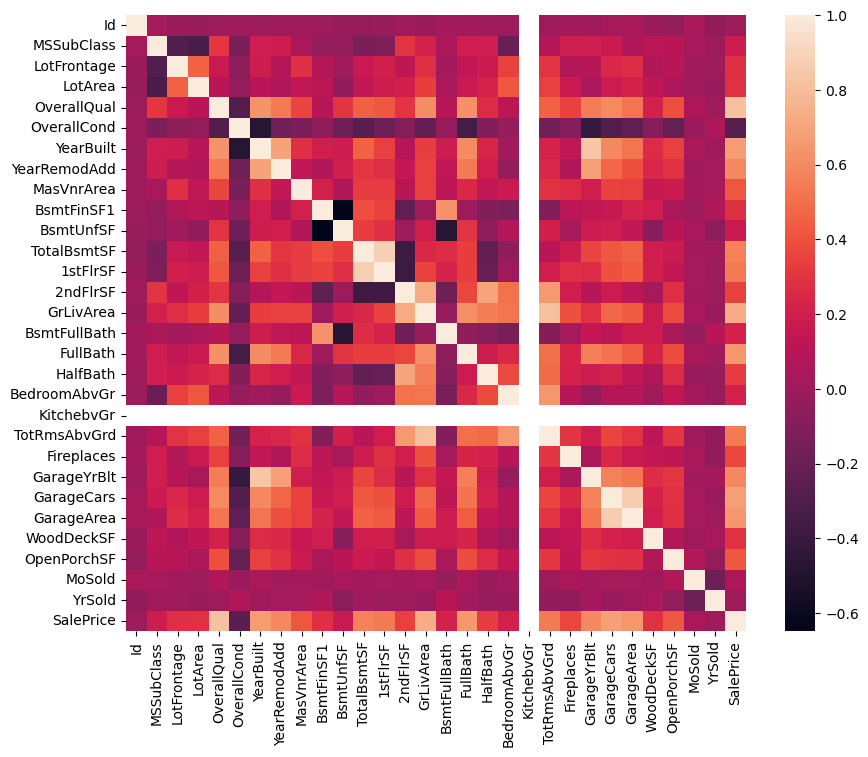

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_limpio.corr())
plt.show()

In [20]:
print(df_limpio.corr()["SalePrice"].sort_values(ascending=False).head(11))

SalePrice       1.000000
OverallQual     0.814589
GrLivArea       0.734616
GarageCars      0.675677
YearBuilt       0.668904
GarageArea      0.644276
FullBath        0.643810
GarageYrBlt     0.588055
YearRemodAdd    0.587959
TotalBsmtSF     0.565523
TotRmsAbvGrd    0.541972
Name: SalePrice, dtype: float64


C:\Users\mjkam\AppData\Local\Temp\ipykernel_12328\2925983498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_limpio.corr()["SalePrice"].sort_values(ascending=False).head(11))


### Paso 2: Responder las preguntas.
1. ¿Con las variables numéricas que se tienen es suficiente para predecir la variable objetivo?
    R.Si, a mi criterio las correlaciones con la variable objetivo son muy fuertes, por lo que bastaria con esas para predecir       un comportamiento de la variable objetivo.
2. ¿Alguna de las variables categóricas servirá realmente para determinar la variable objetivo?
    R.Puede ser, al no haber convertido las variables categoricas a numericas, aun es dificil si podria afectar verdaderamente o     no, dando un vistazo podria arriesgarme a decir que quiza, importe la variable Neighborhood o tambie podria ser el tipo de      calle o materiales de la casa.


### Paso 3: Conversión de categórico a numérico. Hay que seleccionar las columnas que ya fueron categorizadas y hay que sacar su valor con un "one-hot encoder", luego hay que agregarlas al dataset y eliminar su columna categórica. Hay que mostrar de nuevo las correlaciones para ver si cambiaron las variables más correlacionadas con la variable objetivo.

In [21]:
#Colmnas para convertir a numerico
columnas_a_numerico=df_limpio.select_dtypes(include=["category"]).columns
df_dummies = pd.get_dummies(df_limpio[columnas_a_numerico])

#Concatenandomel resultado
df_limpio = pd.concat([df_limpio, df_dummies], axis=1)

#Eliminando columnas ya categorizadas
columnas_a_mantener=df_limpio.columns[~df_limpio.columns.isin(columnas_a_numerico)]
df_previo = df_limpio[columnas_a_mantener].copy()
display(df_previo)
print(df_previo.info())

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,CollgCr,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,CollgCr,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,Crawfor,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,NoRidge,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,Mitchel,5,5,1993,1995,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,90.0,17217,Mitchel,5,5,2006,2006,0.0,...,0,0,0,1,1,0,0,0,0,0
1454,1455,20,62.0,7500,Somerst,7,5,2004,2005,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,1456,60,62.0,7917,Gilbert,6,5,1999,2000,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,NWAmes,6,6,1978,1988,119.0,...,0,0,0,1,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 1458
Columns: 135 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(27), object(1), uint8(104)
memory usage: 301.3+ KB
None


In [22]:
print(df_previo.corr()["SalePrice"].sort_values(ascending=False).head(11))

SalePrice           1.000000
OverallQual         0.814589
GrLivArea           0.734616
GarageCars          0.675677
YearBuilt           0.668904
GarageArea          0.644276
FullBath            0.643810
GarageYrBlt         0.588055
YearRemodAdd        0.587959
Foundation_PConc    0.577608
TotalBsmtSF         0.565523
Name: SalePrice, dtype: float64


C:\Users\mjkam\AppData\Local\Temp\ipykernel_12328\738936450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_previo.corr()["SalePrice"].sort_values(ascending=False).head(11))


Como se puede observar las correlaciones no han cambiado mucho, solamente las ultimas 2 posiciones fueron remplazadas por variables con mas correlacion.

### Paso 4: Conversión de las demás columnas objeto a numérico. Para ello se va a requerir un encoder más avanzado, usar la clase "MultiColumnLabelEncoder" vista en clase, el dataframe resultante va a ser la versión consolidada y completamente numérica.

In [23]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns  # Lista de columnas a codificar

    def fit(self, X, y=None):
        return self  # No es necesario hacer nada en el ajuste

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                label_encoder = LabelEncoder()
                output[col] = label_encoder.fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                label_encoder = LabelEncoder()
                output[colname] = label_encoder.fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

# Lista de columnas a codificar (columnas categóricas)
columnas_categoricas = ["Neighborhood"]  # Reemplaza con tus nombres de columnas

# Crear una instancia del codificador
encoder = MultiColumnLabelEncoder(columns=columnas_categoricas)

# Aplicar la transformación a las columnas seleccionadas
df_final = encoder.fit_transform(df_previo)


### Paso 5: Mostrar la información del nuevo dataframe (numérico), mostrar que no contenga nulos, que todos los datos sean de tipo int/float/uint. Mostrar de nuevo las correlaciones, filtrar para que solo muestre las 10 más correlacionadas a la variable objetivo.

In [24]:
display(df_final)
print(df_final.isna().sum().sort_values(ascending=False))

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,3,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,4,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,12,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,9,5,5,1993,1995,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,90.0,17217,9,5,5,2006,2006,0.0,...,0,0,0,1,1,0,0,0,0,0
1454,1455,20,62.0,7500,18,7,5,2004,2005,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,1456,60,62.0,7917,6,6,5,1999,2000,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,11,6,6,1978,1988,119.0,...,0,0,0,1,0,0,0,0,1,0


Id                       0
BsmtFinType1_Rec         0
Functiol_Min1            0
Functiol_Maj2            0
Functiol_Maj1            0
                        ..
LotShape_IR2             0
LotShape_IR1             0
Street_Pave              0
Street_Grvl              0
SaleCondition_Partial    0
Length: 135, dtype: int64


In [25]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 1458
Columns: 135 entries, Id to SaleCondition_Partial
dtypes: float64(3), int32(1), int64(27), uint8(104)
memory usage: 297.9 KB
None


In [26]:
print(df_final.corr()["SalePrice"].sort_values(ascending=False).head(11))

SalePrice           1.000000
OverallQual         0.814589
GrLivArea           0.734616
GarageCars          0.675677
YearBuilt           0.668904
GarageArea          0.644276
FullBath            0.643810
GarageYrBlt         0.588055
YearRemodAdd        0.587959
Foundation_PConc    0.577608
TotalBsmtSF         0.565523
Name: SalePrice, dtype: float64


## Conclusiones acerca del análisis exploratorio y del dataset en general.

Despues de realizar el EDA a este dataset, se puede concluir que la variable objetivo tiene muchisimas correlaciones significativas, si bien el tratar tantos datos no fue sencillo, tambien se puede dar cuenta, que muchas columnas no son relevantes; es decir habia muchos nulos por lo que tuve que filtrar algunas columnas, y aun despues de eso tuve que imputar o volver a analizar que muchas columnas ademas de no tener nulos, tenian muchos datos en cero y algunas otras no aportaban nada al analisis que se pretendia , por que opte por filtrar tambien esas columnas, de todo esto me percate al tratar anomalias pues me di cuenta que este tipo de datos en "0" me hacia tener que borrar muchos datos, y de no haber borrado esas columnas habria perdido mas del 50 % de los datos originales, en general fue sencillo manipular este dataset y en general puedo que concluir que se puede predecir con facilidad ala variable objetivo, pues esta relacionada significativamente con Overalqual, GrlivArea Y GarageCars, solo con estos datos podemos decir que el hecho de que la casa tenga garage tiene que ver mucho con el precio de una casa, eso sin mencionar el año en que fue construida, tambien por ejemplo el tipo de material de la fundacion, todas estas variables son muy significativas para determinar o predecir como se comporta el precio cuando mueves el valor de estas variables.